# Problem Definition

The problem is supervised text classification, and our goal is to investigate which supervised machine learning methods are best suited to solve it. 

Given a new movie information (overview, company, director, budget, …), we want to assign it to one of top genres. The classifier makes the assumption that each new movie is assigned to at least one dominant genres. This is multi-label classification problem.

Input: Overview description + other supporting features (TBD)

Output: Genre 

TMDb Movies Dataset: https://www.kaggle.com/datasets/juzershakir/tmdb-movies-dataset

In [18]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import seaborn as sns

# Read Data and divide genres into different columns

In [7]:
df = pd.read_csv('tmdb_movies_data.csv')

train_df = df.sample(frac=0.8, random_state=123)
test_df = df.drop(train_df.index)

In [8]:
train_df

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
3420,71676,tt1071875,1.481016,57000000,149217355,Ghost Rider: Spirit of Vengeance,Nicolas Cage|CiarÃ¡n Hinds|Violante Placido|Fe...,http://www.thespiritofvengeance.com/,Mark Neveldine|Brian Taylor,He Rides Again.,...,When the devil resurfaces with aims to take ov...,95,Action|Fantasy|Thriller,Columbia Pictures|Imagenation Abu Dhabi FZ|Mar...,12/10/2011,752,4.7,2011,5.525569e+07,1.446510e+08
1672,41360,tt1270291,0.356006,425000,0,Hunter Prey,Isaac C. Singleton Jr.|Clark Bartram|Damion Po...,http://www.hunterpreythemovie.com/,Sandy Collora,One man. One alien. One choice.,...,The Prometheus has dropped out of orbit. Commu...,90,Science Fiction|Thriller,NBV Productions|Montauk Films,1/1/2009,22,5.5,2009,4.319702e+05,0.000000e+00
293,277713,tt2262161,0.421790,0,0,Sunset Song,Peter Mullan|Agyness Deyn|Kevin Guthrie|Hugh R...,NaN,Terence Davies,NaN,...,The daughter of a Scottish farmer comes of age...,135,Drama,Iris productions|Hurricane Films|SellOutPictures,12/4/2015,19,7.1,2015,0.000000e+00,0.000000e+00
8306,11066,tt0103859,0.410039,40000000,70100000,Boomerang,Eddie Murphy|Robin Givens|Halle Berry|David Al...,NaN,Reginald Hudlin,A Player Who's About to be Played.,...,Marcus is a successful advertising executive w...,117,Drama|Comedy|Romance,Paramount Pictures,6/30/1992,69,5.5,1992,6.216097e+07,1.089371e+08
1748,2325,tt0432314,0.258982,0,0,Leningrad,Gabriel Byrne|Mira Sorvino|Armin Mueller-Stahl...,http://www.leningradfilm.com/,Aleksandr Buravsky,Some fight. Others fall. All are heroes.,...,When in 1941 Nazi Germany invaded the Soviet U...,120,War|Drama,Channel One Russia|KoBura Film|Ministerstvo ku...,1/1/2009,17,5.7,2009,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9939,839,tt0067023,0.462681,450000,0,Duel,Dennis Weaver|Jacqueline Scott|Eddie Firestone...,NaN,Steven Spielberg,Fear is the driving force.,...,"Travelling businessman, David Mann, angers the...",90,Horror|Action|Mystery|Thriller,Universal TV,11/10/1971,166,7.0,1971,2.423338e+06,0.000000e+00
562,339060,tt3877296,0.096299,0,0,The Cokeville Miracle,Nathan Stevens|Jasen Wade|Caitlin E.J. Meyer|M...,NaN,T.C. Christensen,Based on actual events.,...,"On May 9, 1986, a small ranching community in ...",94,Mystery|Drama|History|Family|Thriller,NaN,6/5/2015,13,5.1,2015,0.000000e+00,0.000000e+00
8890,1091,tt0084787,2.355353,10000000,13782838,The Thing,Kurt Russell|Keith David|Wilford Brimley|Donal...,http://www.theofficialjohncarpenter.com/the-th...,John Carpenter,Man is The Warmest Place to Hide.,...,Scientists in the Antarctic are confronted by ...,109,Horror|Science Fiction|Mystery|Thriller,Universal Pictures|Turman-Foster Company,6/25/1982,797,7.5,1982,2.259642e+07,3.114429e+07
1496,19840,tt1032815,0.767264,18000000,0,"I Love You, Beth Cooper",Hayden Panettiere|Paul Rust|Lauren London|Laur...,http://www.iloveyoubethcoopermovie.com/,Chris Columbus,Popularity is nice. Popular girls are not.,...,Nerdy teenager Denis Cooverman (Paul Rust) har...,102,Comedy|Romance,Ingenious Film Partners|1492 Pictures|Fox Atom...,7/10/2009,106,4.9,2009,1.829521e+07,0.000000e+00


In [9]:
train_df[['genres_1', 'genres_2', 'genres_3','genres_4', 'genres_5']] = df.genres.str.split("|", expand = True)
print(train_df)

          id    imdb_id  popularity    budget    revenue  \
3420   71676  tt1071875    1.481016  57000000  149217355   
1672   41360  tt1270291    0.356006    425000          0   
293   277713  tt2262161    0.421790         0          0   
8306   11066  tt0103859    0.410039  40000000   70100000   
1748    2325  tt0432314    0.258982         0          0   
...      ...        ...         ...       ...        ...   
9939     839  tt0067023    0.462681    450000          0   
562   339060  tt3877296    0.096299         0          0   
8890    1091  tt0084787    2.355353  10000000   13782838   
1496   19840  tt1032815    0.767264  18000000          0   
1378   42218  tt0075989    0.108321         0          0   

                        original_title  \
3420  Ghost Rider: Spirit of Vengeance   
1672                       Hunter Prey   
293                        Sunset Song   
8306                         Boomerang   
1748                         Leningrad   
...                        

# Data Exploration

In [10]:
train_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8693 entries, 3420 to 1378
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    8693 non-null   int64  
 1   imdb_id               8684 non-null   object 
 2   popularity            8693 non-null   float64
 3   budget                8693 non-null   int64  
 4   revenue               8693 non-null   int64  
 5   original_title        8693 non-null   object 
 6   cast                  8642 non-null   object 
 7   homepage              2358 non-null   object 
 8   director              8658 non-null   object 
 9   tagline               6413 non-null   object 
 10  keywords              7525 non-null   object 
 11  overview              8689 non-null   object 
 12  runtime               8693 non-null   int64  
 13  genres                8675 non-null   object 
 14  production_companies  7872 non-null   object 
 15  release_date      

Numerical Variables

In [11]:
train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,8693.0,6.680747e+04,9.248694e+04,5.000000,10641.000000,20969.000000,7.717400e+04,4.178590e+05
popularity,8693.0,6.409280e-01,1.018641e+00,0.000188,0.205701,0.381737,7.060230e-01,3.298576e+01
budget,8693.0,1.433949e+07,3.045441e+07,0.000000,0.000000,0.000000,1.500000e+07,4.250000e+08
revenue,8693.0,3.869294e+07,1.167752e+08,0.000000,0.000000,0.000000,2.343812e+07,2.781506e+09
runtime,8693.0,1.017014e+02,3.118929e+01,0.000000,90.000000,99.000000,1.110000e+02,9.000000e+02
vote_count,8693.0,2.121747e+02,5.661980e+02,10.000000,17.000000,38.000000,1.420000e+02,8.903000e+03
vote_average,8693.0,5.968503e+00,9.407674e-01,1.500000,5.400000,6.000000,6.600000e+00,9.200000e+00
release_year,8693.0,2.001315e+03,1.291234e+01,1960.000000,1995.000000,2006.000000,2.011000e+03,2.015000e+03
budget_adj,8693.0,1.719889e+07,3.375153e+07,0.000000,0.000000,0.000000,2.026067e+07,4.250000e+08
revenue_adj,8693.0,5.005171e+07,1.424856e+08,0.000000,0.000000,0.000000,3.300817e+07,2.827124e+09


In [12]:
num_vars = train_df.columns[train_df.dtypes != 'object']
print(num_vars)

Index(['id', 'popularity', 'budget', 'revenue', 'runtime', 'vote_count',
       'vote_average', 'release_year', 'budget_adj', 'revenue_adj'],
      dtype='object')


In [13]:
train_df_num = pd.DataFrame(train_df, columns = ['popularity', 'budget', 'revenue', 'runtime', 'vote_count', 'vote_average', 'release_year', 'budget_adj', 'revenue_adj'])

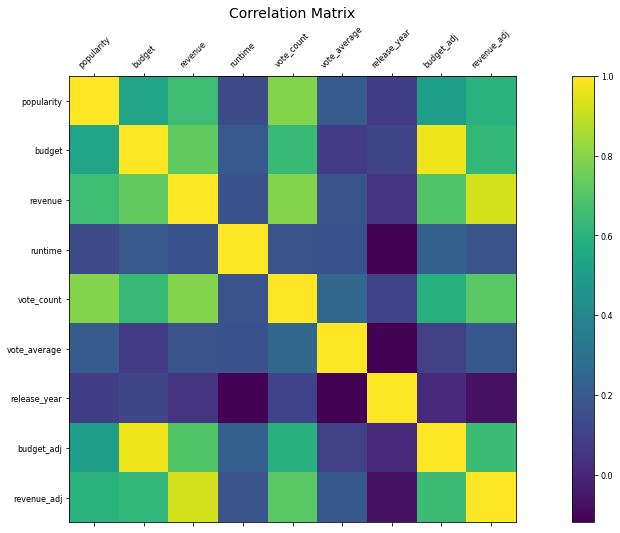

In [14]:
f = plt.figure(figsize=(20, 8))
plt.matshow(train_df_num.corr(), fignum=f.number)
plt.xticks(range(train_df_num.select_dtypes(['number']).shape[1]), train_df_num.select_dtypes(['number']).columns, fontsize=8, rotation=45)
plt.yticks(range(train_df_num.select_dtypes(['number']).shape[1]), train_df_num.select_dtypes(['number']).columns, fontsize=8)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=8)
plt.title('Correlation Matrix', fontsize=14);

In [15]:
train_df_num.corr()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
popularity,1.000000,0.535266,0.653071,0.136958,0.792930,0.201772,0.086455,0.502846,0.594029
budget,0.535266,1.000000,0.725424,0.194861,0.636858,0.078076,0.115645,0.969407,0.621531
revenue,0.653071,0.725424,1.000000,0.161761,0.793027,0.168371,0.054817,0.697545,0.922385
runtime,0.136958,0.194861,0.161761,1.000000,0.165795,0.160907,-0.114907,0.221448,0.176094
vote_count,0.792930,0.636858,0.793027,0.165795,1.000000,0.250607,0.104355,0.590762,0.712120
vote_average,0.201772,0.078076,0.168371,0.160907,0.250607,1.000000,-0.119782,0.090900,0.190427
release_year,0.086455,0.115645,0.054817,-0.114907,0.104355,-0.119782,1.000000,0.017840,-0.068409
budget_adj,0.502846,0.969407,0.697545,0.221448,0.590762,0.090900,0.017840,1.000000,0.646710
revenue_adj,0.594029,0.621531,0.922385,0.176094,0.712120,0.190427,-0.068409,0.646710,1.000000


array([[<Axes: title={'center': 'popularity'}>,
        <Axes: title={'center': 'budget'}>,
        <Axes: title={'center': 'revenue'}>],
       [<Axes: title={'center': 'runtime'}>,
        <Axes: title={'center': 'vote_count'}>,
        <Axes: title={'center': 'vote_average'}>],
       [<Axes: title={'center': 'release_year'}>,
        <Axes: title={'center': 'budget_adj'}>,
        <Axes: title={'center': 'revenue_adj'}>]], dtype=object)

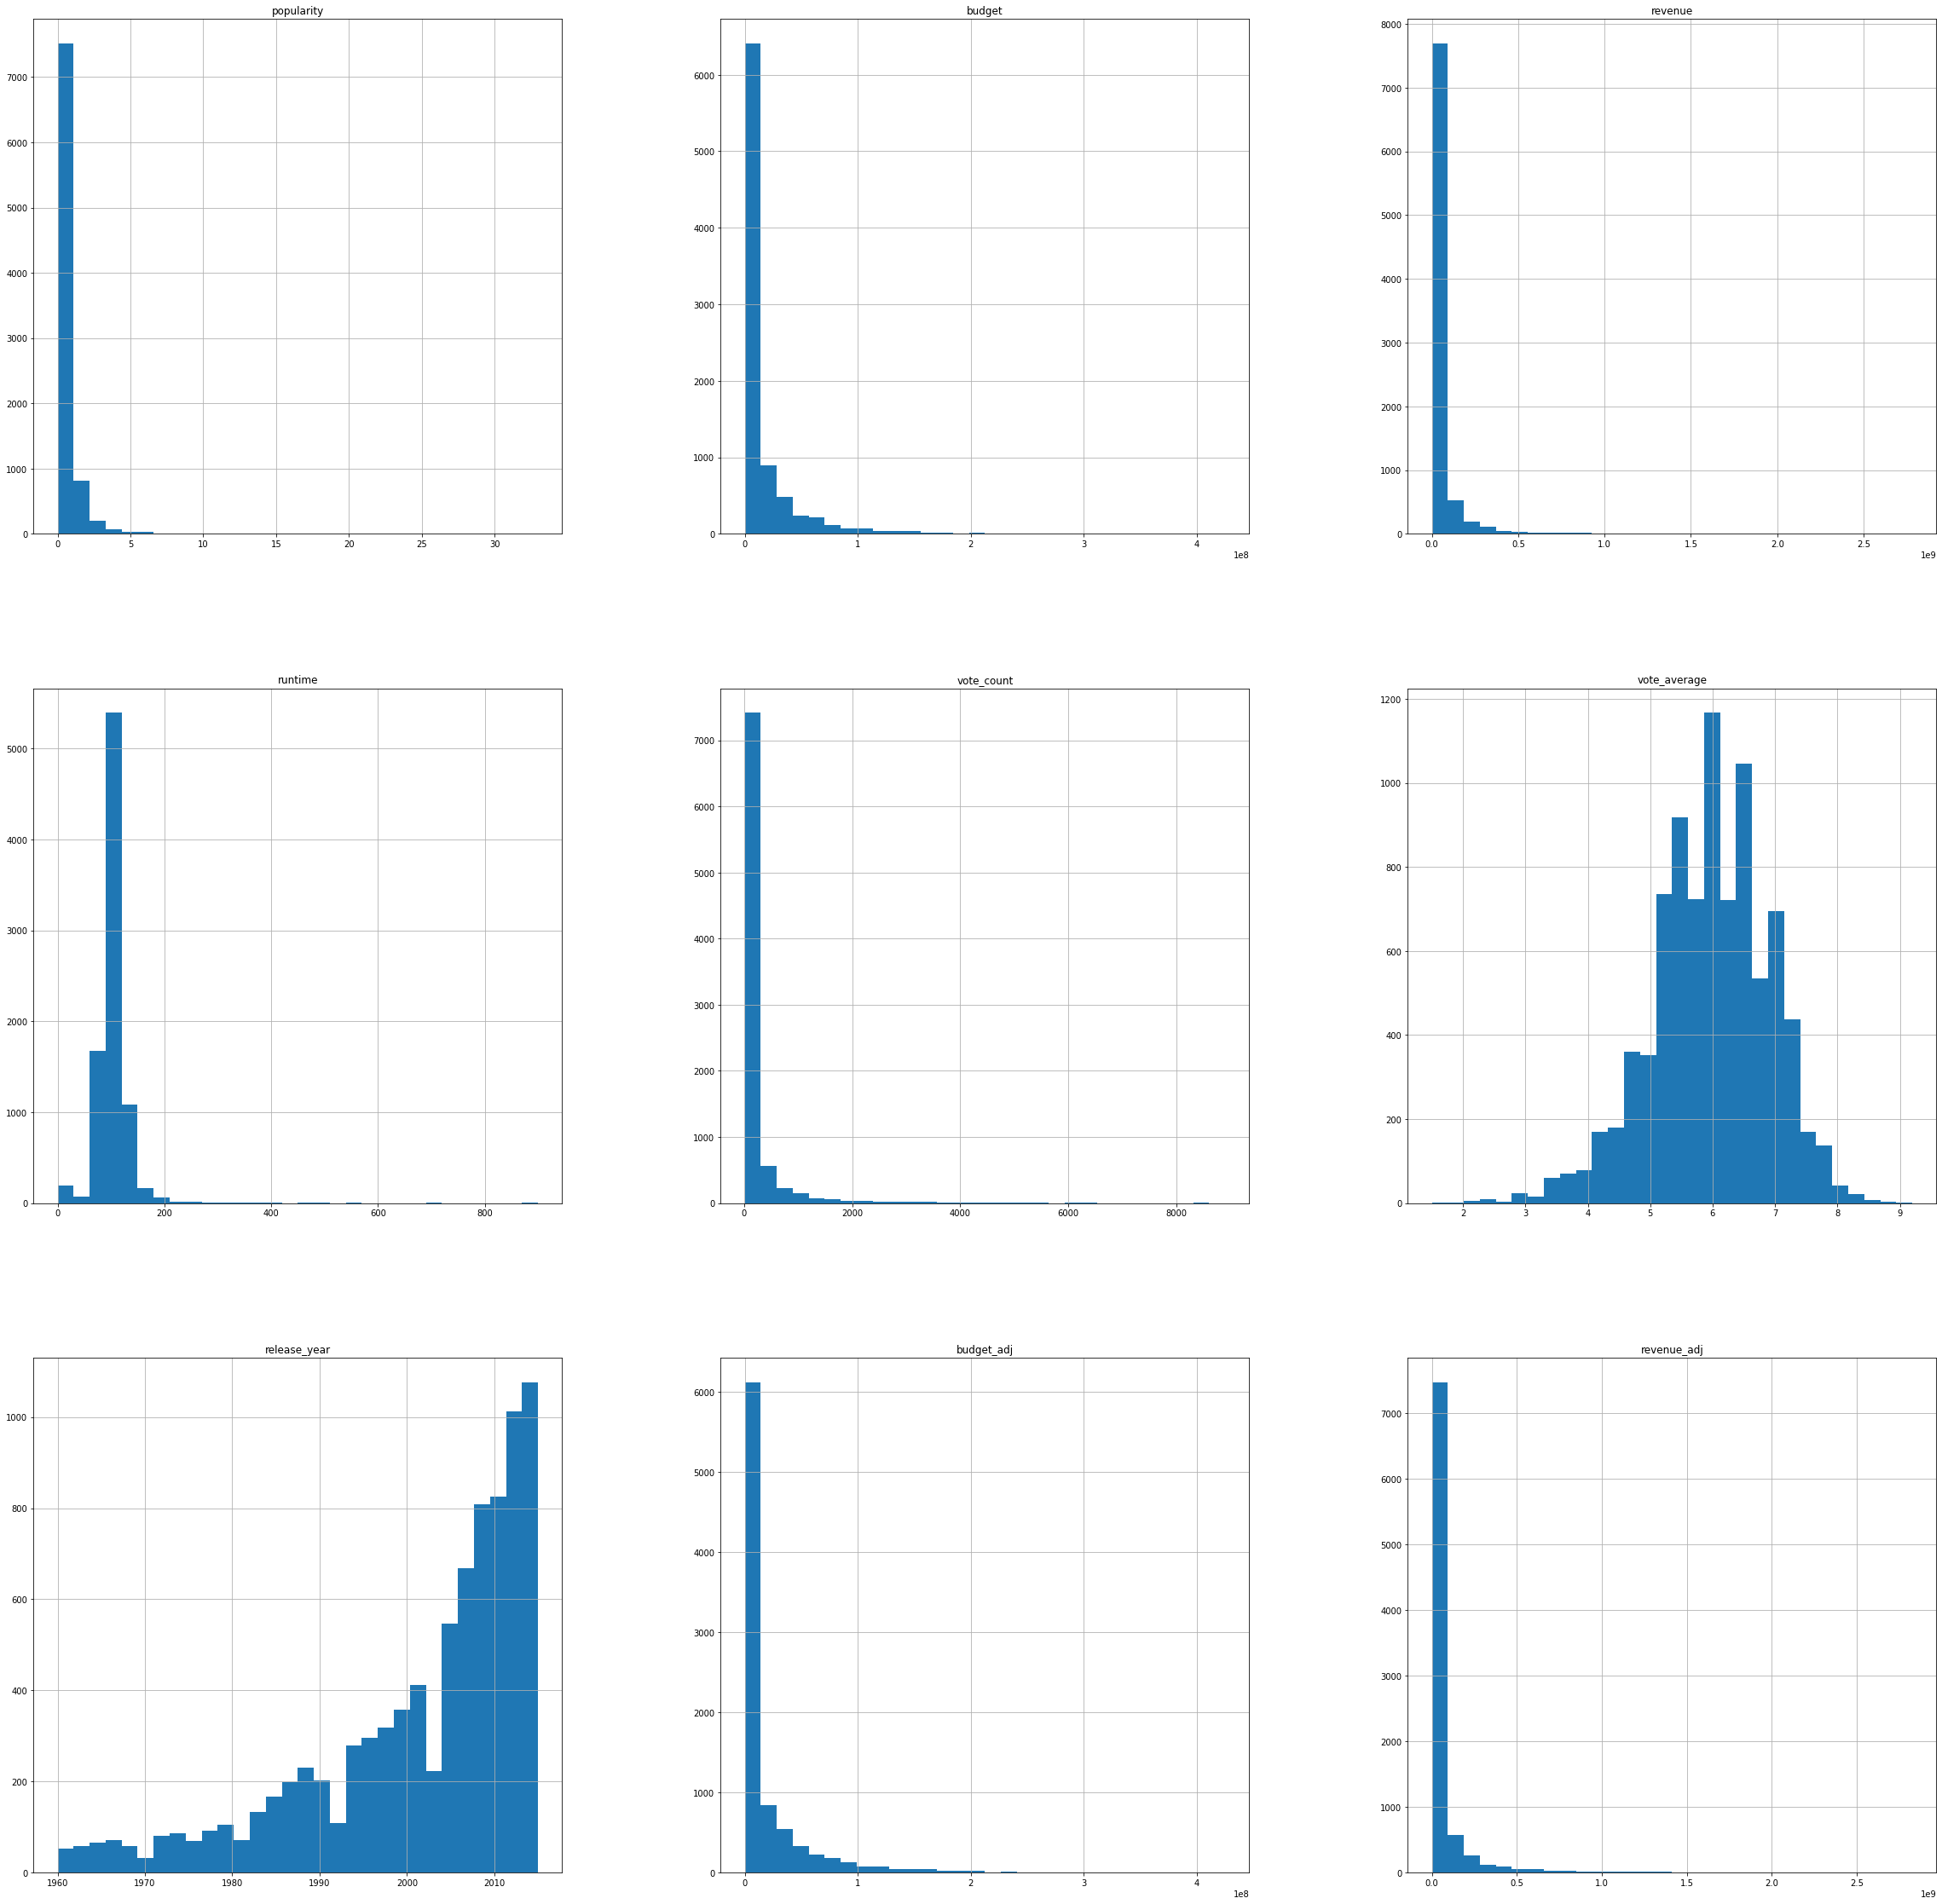

In [19]:
plt.rcParams["figure.figsize"] = (40, 40)
train_df_num.hist(bins=30)

<Axes: xlabel='budget_adj', ylabel='vote_count'>

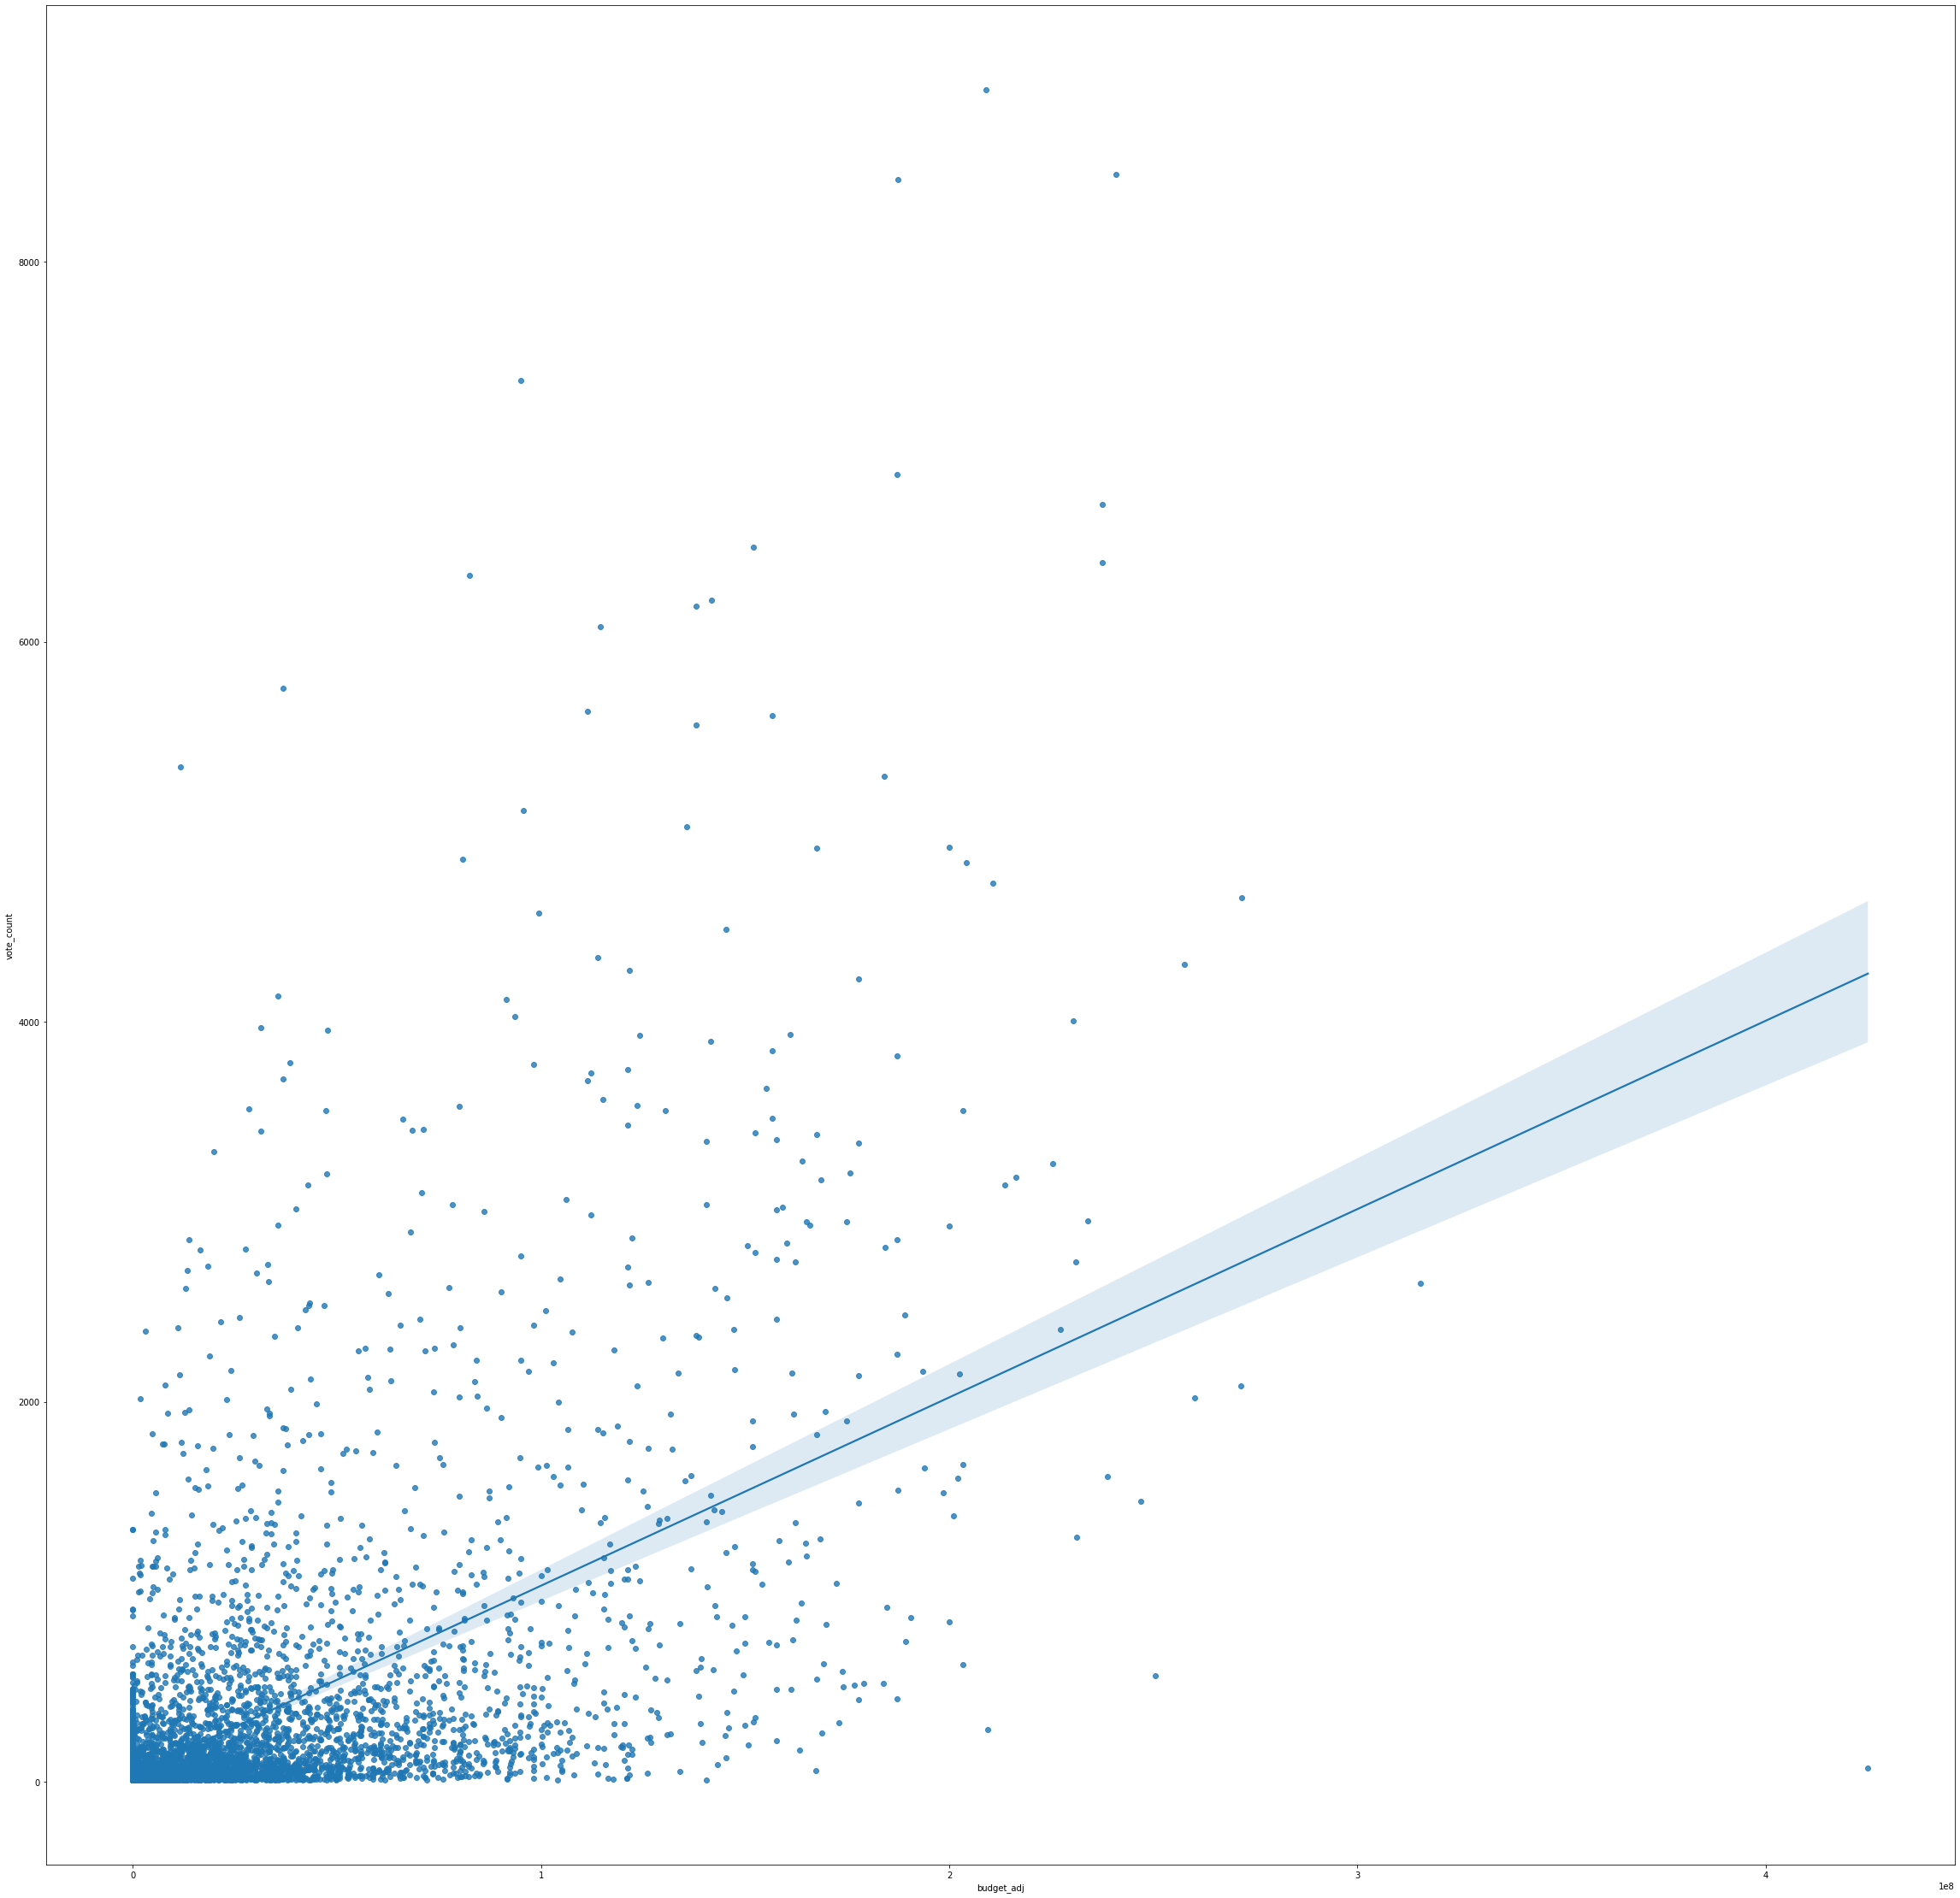

In [20]:
sns.regplot(x='budget_adj',y='vote_count', data = train_df)

<Axes: xlabel='budget', ylabel='revenue'>

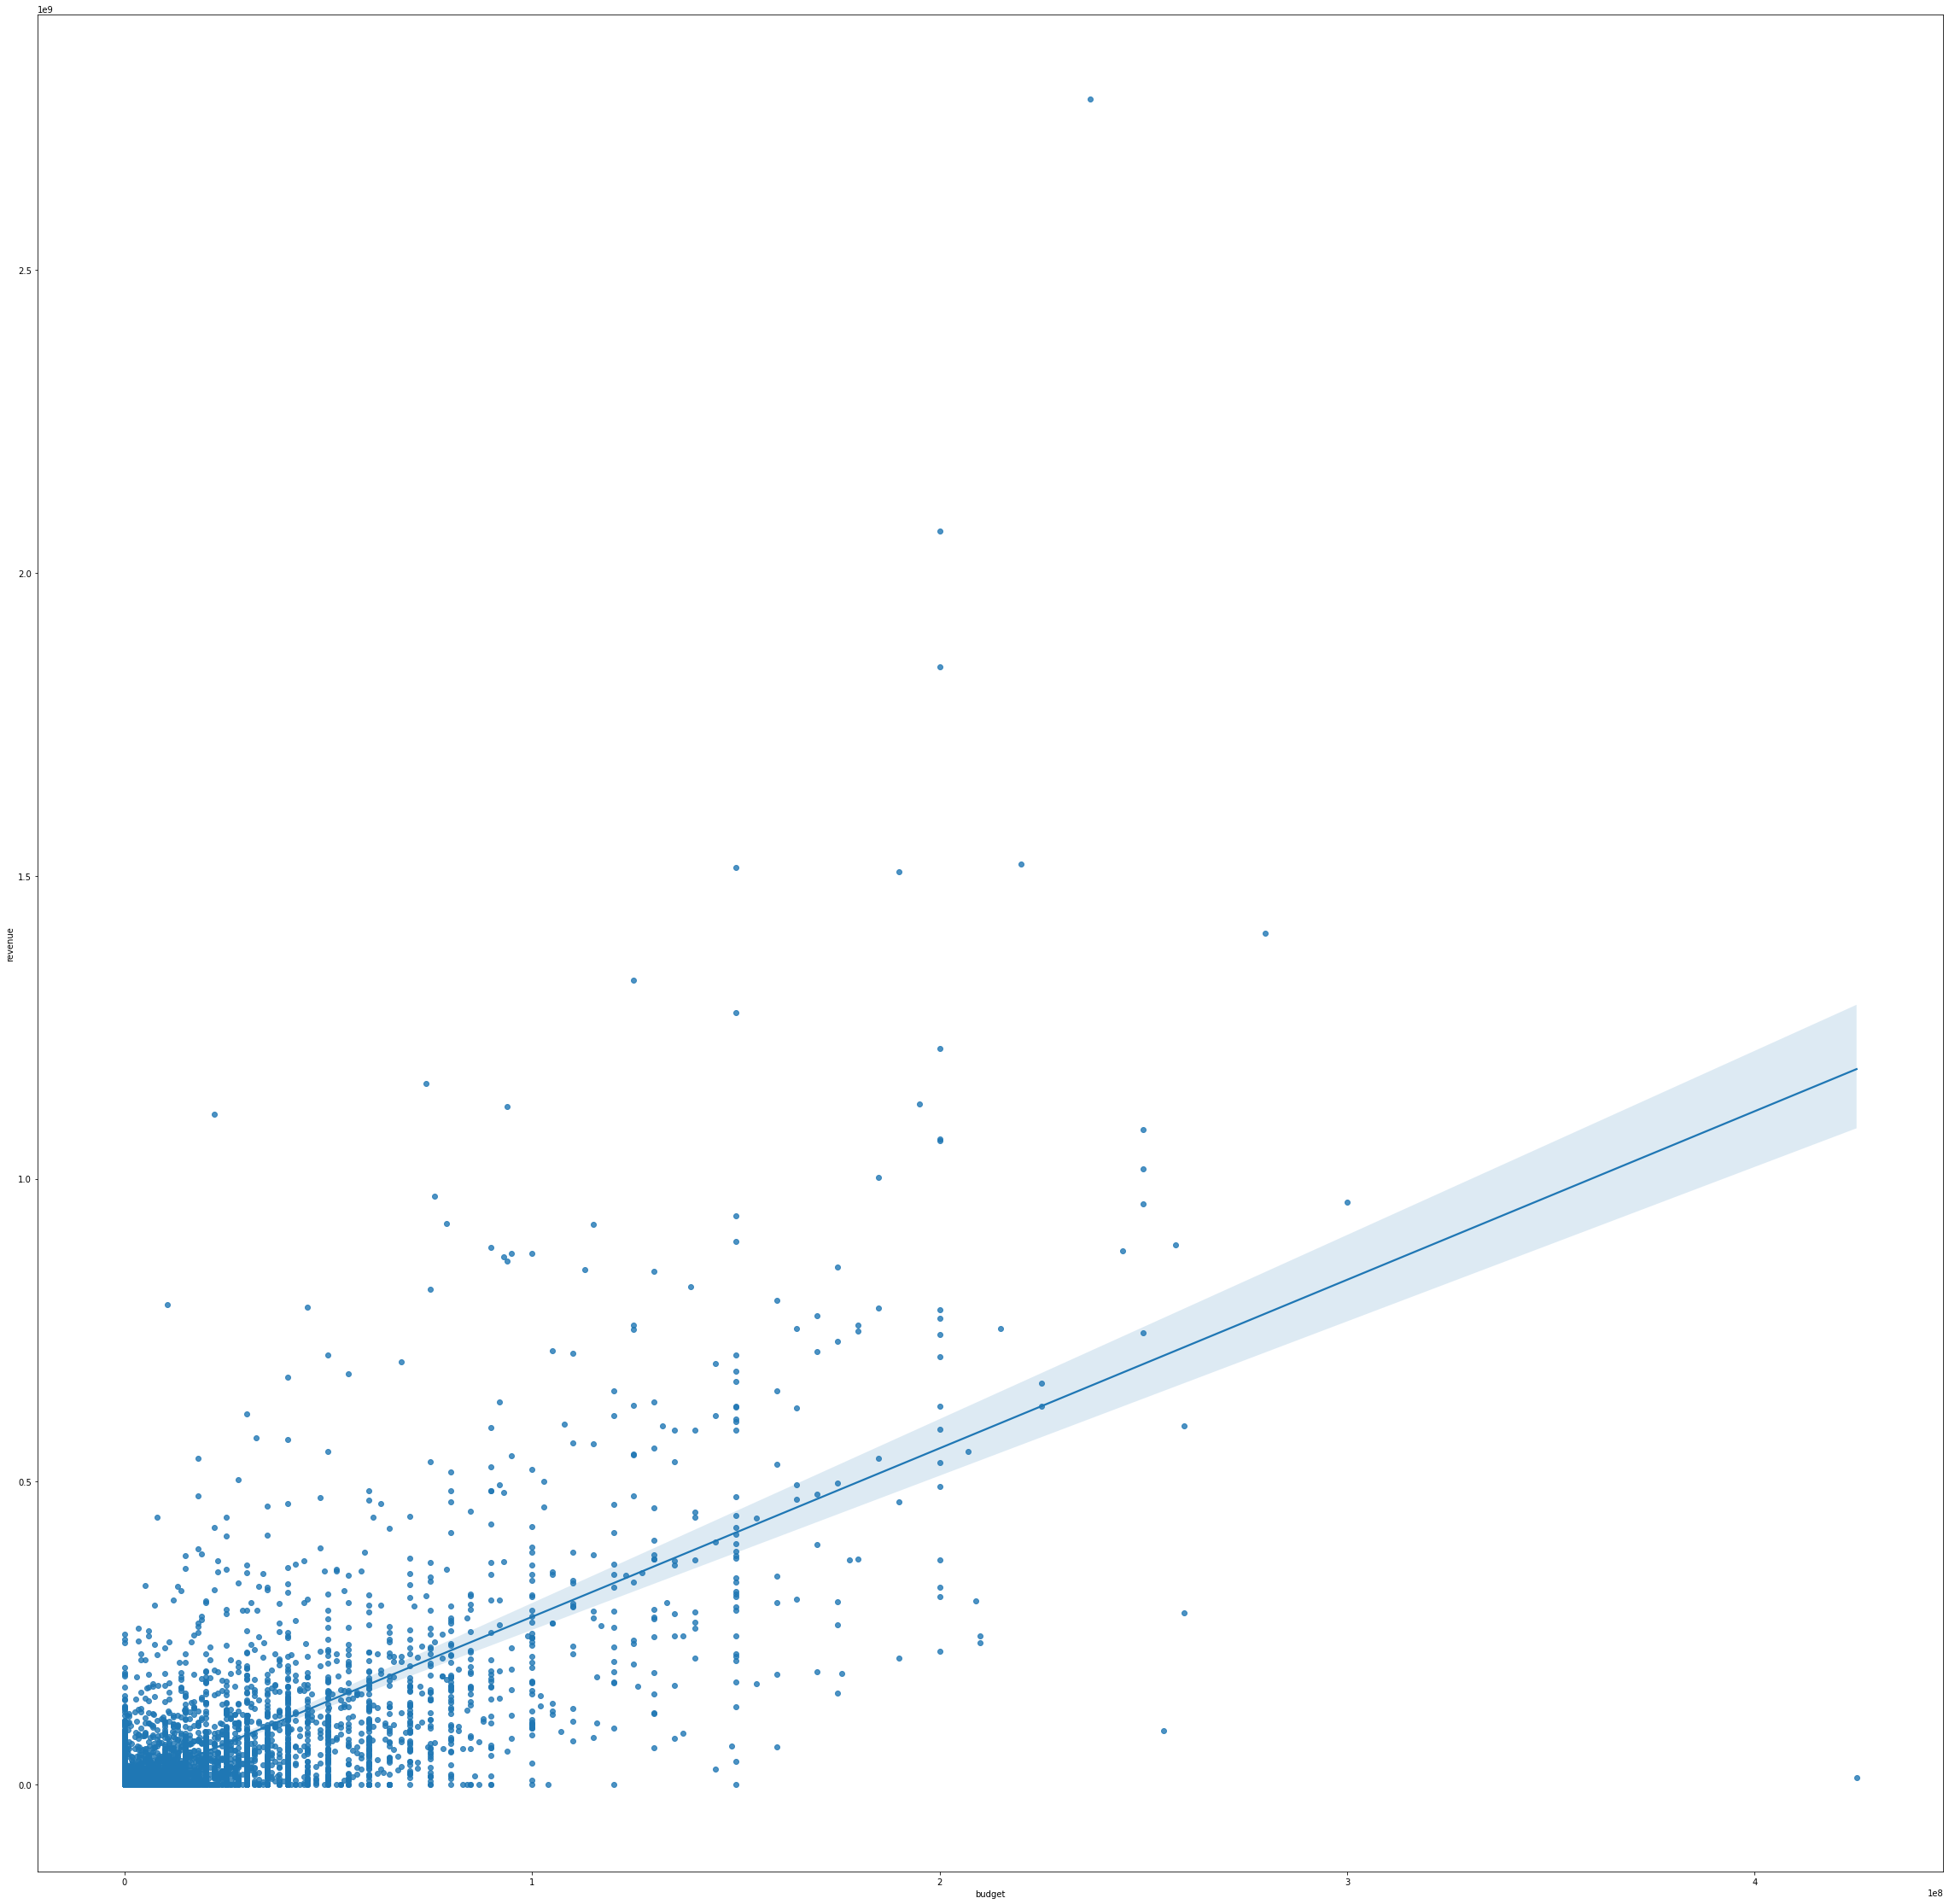

In [21]:
sns.regplot(x='budget',y='revenue', data = train_df)

<Axes: xlabel='budget', ylabel='popularity'>

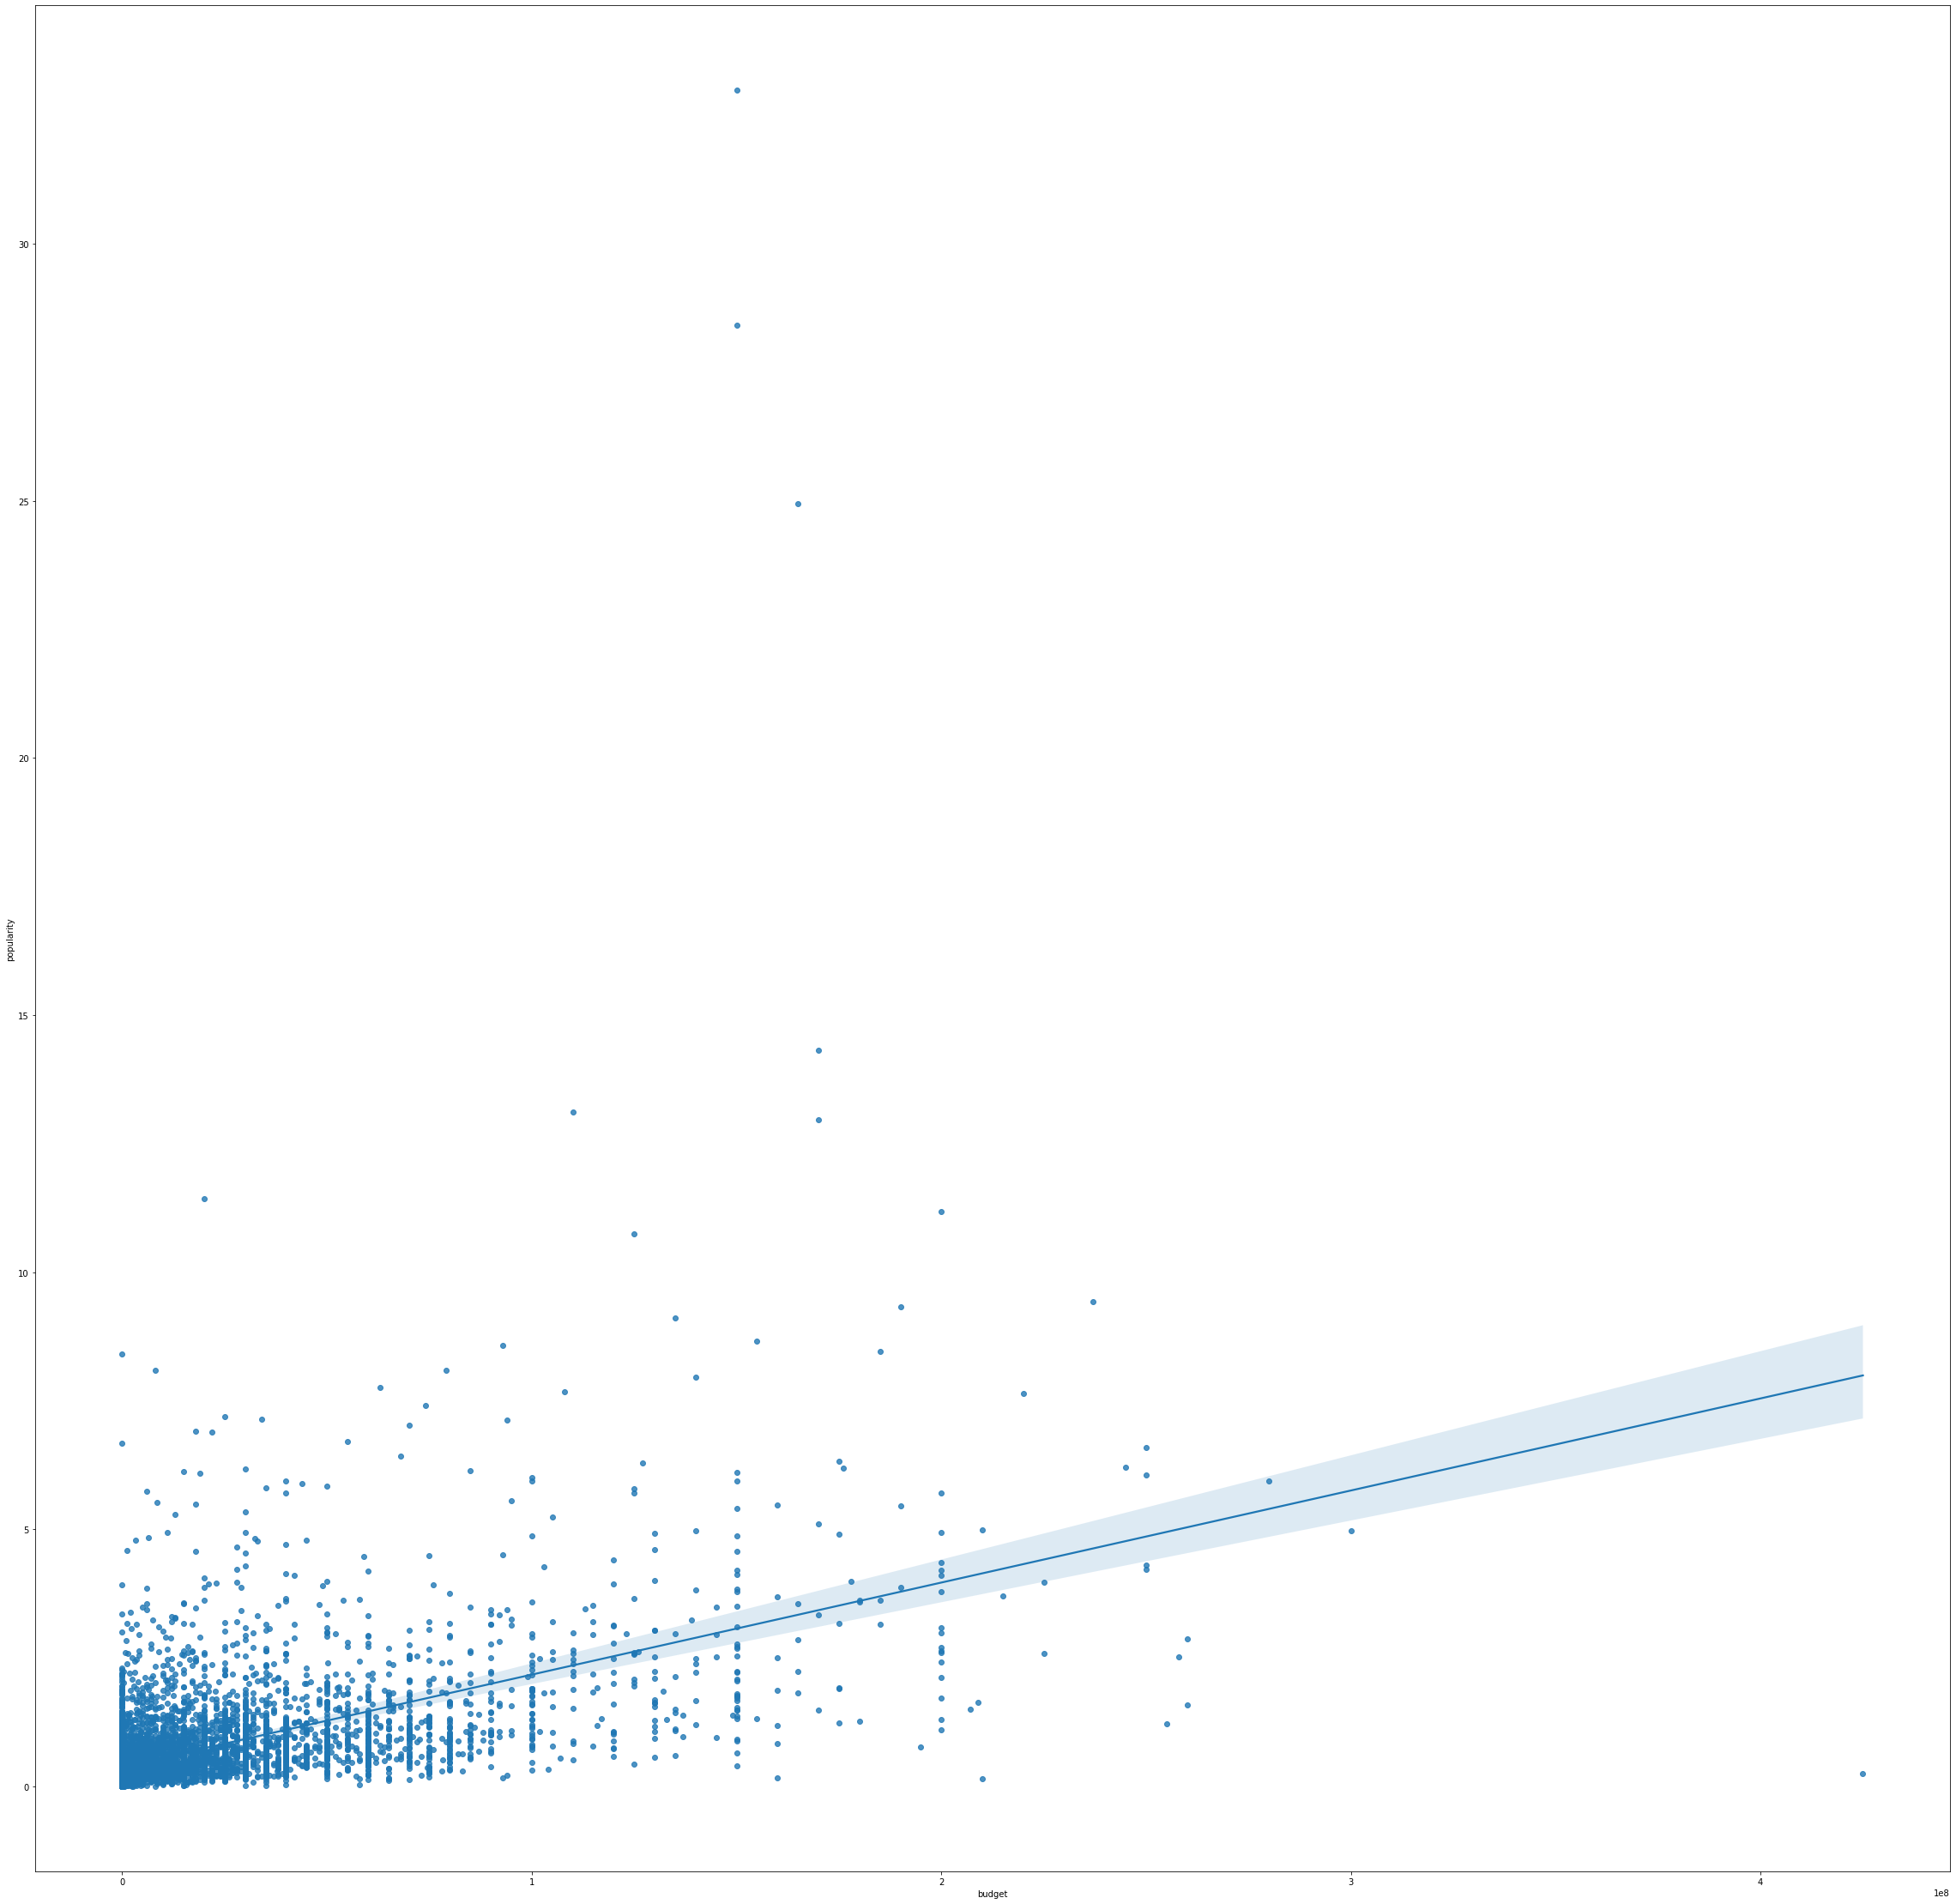

In [22]:
sns.regplot(x='budget',y='popularity', data = train_df)

<Axes: xlabel='revenue', ylabel='popularity'>

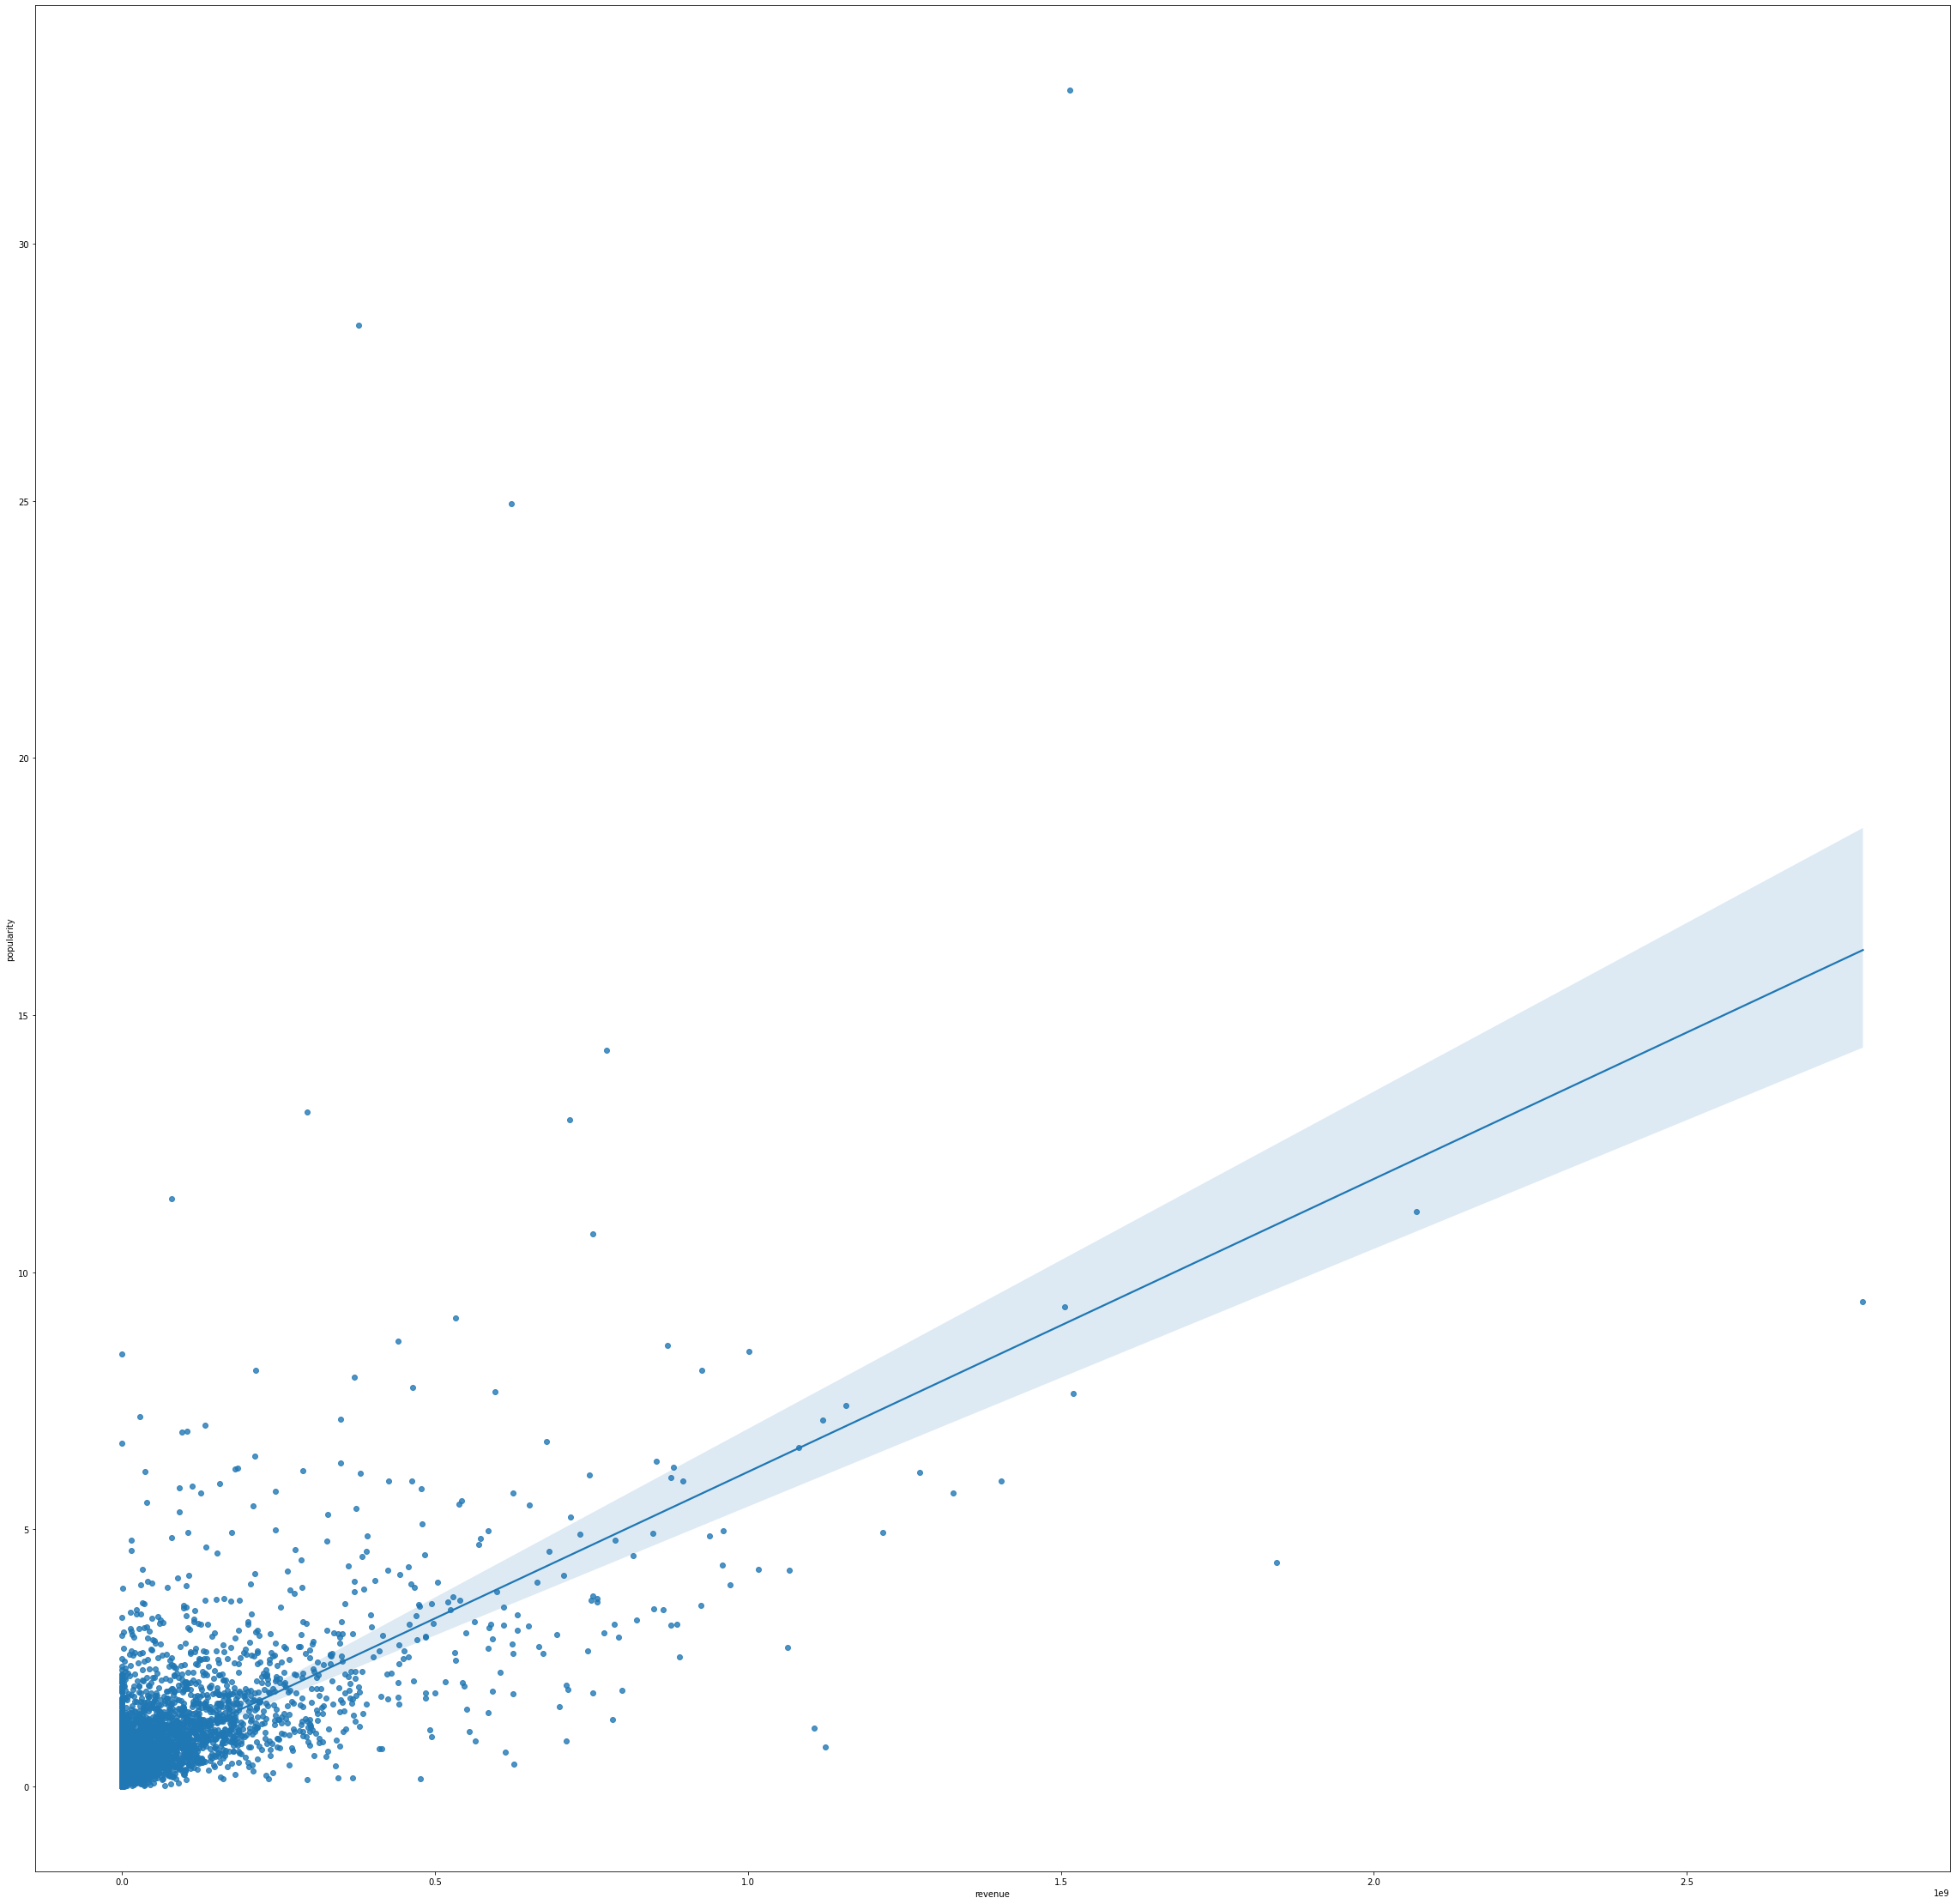

In [23]:
sns.regplot(x='revenue',y='popularity', data = train_df)

Categorical Variables

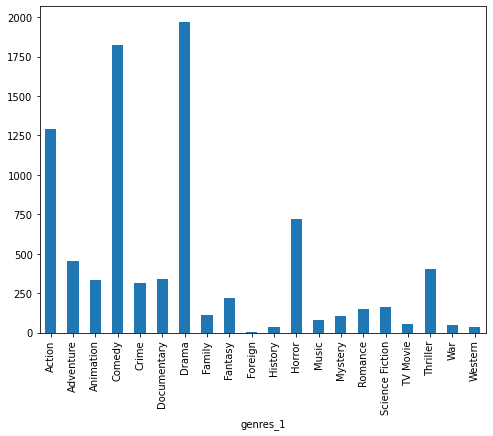

In [24]:
fig = plt.figure(figsize=(8,6))
train_df.groupby('genres_1').overview.count().plot.bar(ylim=0)
plt.show()

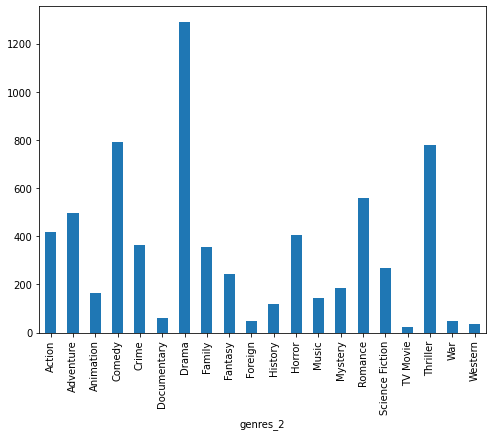

In [25]:
fig = plt.figure(figsize=(8,6))
train_df.groupby('genres_2').overview.count().plot.bar(ylim=0)
plt.show()

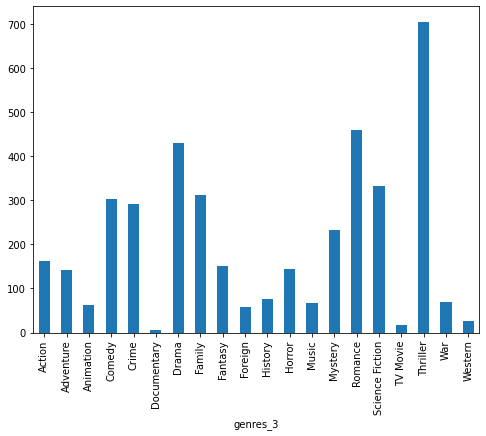

In [26]:
fig = plt.figure(figsize=(8,6))
train_df.groupby('genres_3').overview.count().plot.bar(ylim=0)
plt.show()

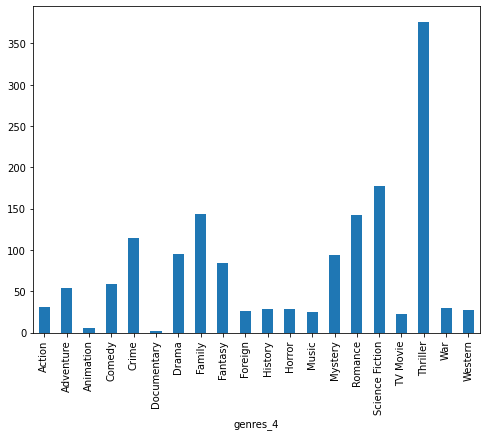

In [27]:
fig = plt.figure(figsize=(8,6))
train_df.groupby('genres_4').overview.count().plot.bar(ylim=0)
plt.show()

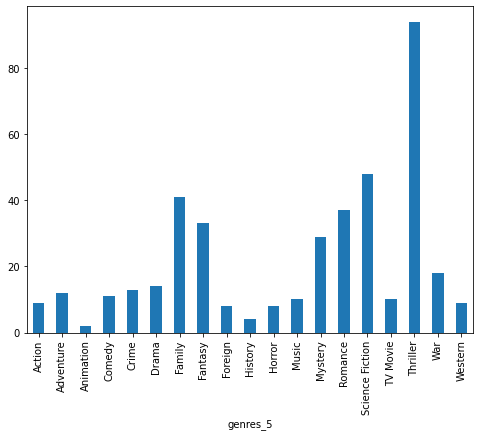

In [28]:
fig = plt.figure(figsize=(8,6))
train_df.groupby('genres_5').overview.count().plot.bar(ylim=0)
plt.show()

In [29]:
genre_columns = ['genres_1', 'genres_2', 'genres_3', 'genres_4', 'genres_5']
df_genres = train_df[genre_columns]
df_genres

,genres_1,genres_2,genres_3,genres_4,genres_5
3420,Action,Fantasy,Thriller,None,None
1672,Science Fiction,Thriller,None,None,None
293,Drama,None,None,None,None
8306,Drama,Comedy,Romance,None,None
1748,War,Drama,None,None,None
...,...,...,...,...,...
9939,Horror,Action,Mystery,Thriller,None
562,Mystery,Drama,History,Family,Thriller
8890,Horror,Science Fiction,Mystery,Thriller,None
1496,Comedy,Romance,None,None,None


In [30]:
print(df_genres.isnull().sum())

genres_1      18
genres_2    1898
genres_3    4649
genres_4    7129
genres_5    8283
dtype: int64


In [31]:
import seaborn as sns

# Explore important features related to Genres
- Budget
- Popularity
- Revenue and ajusted Revenue

From the ANOVA output table below: For the columns 'Genres_1', 'Genres_2', 'Genres_3', and 'Genres4', we can reject the null hypothesis that 'budget' has no statistical significance as the p values fall below our selected alpha of .05 for each of these columns. Therefore there is a significant relationship between 'genres_1' and 'budget'; 'genres_2' and 'budget'; 'genres_3' and 'budget', and 'genres_4' and 'budget'. 

Using an alpha=.05, no significant relationship was found between 'genres_5' and 'budget'. 

Re: see p values in the table below in the PR(>F) columnn which need to be less than our alpha of .05 in order to be significant



In [32]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Fit ANOVA model for each genre column
for genre_col in ['genres_1', 'genres_2', 'genres_3', 'genres_4', 'genres_5']:
    formula = f"budget ~ C({genre_col})"
    model = ols(formula, data=train_df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2, alpha=.05)
    print(f"ANOVA results for {genre_col}:")
    print(anova_table)

ANOVA results for genres_1:
                   sum_sq      df          F         PR(>F)
C(genres_1)  6.914923e+17    19.0  42.760898  1.423597e-152
Residual     7.366378e+18  8655.0        NaN            NaN
ANOVA results for genres_2:
                   sum_sq      df          F        PR(>F)
C(genres_2)  4.754949e+17    19.0  24.454908  1.678480e-83
Residual     6.933229e+18  6775.0        NaN           NaN
ANOVA results for genres_3:
                   sum_sq      df          F        PR(>F)
C(genres_3)  3.085076e+17    19.0  11.667588  1.947609e-35
Residual     5.600014e+18  4024.0        NaN           NaN
ANOVA results for genres_4:
                   sum_sq      df        F        PR(>F)
C(genres_4)  1.503698e+17    19.0  4.77677  5.693018e-11
Residual     2.558114e+18  1544.0      NaN           NaN
ANOVA results for genres_5:
                   sum_sq     df         F    PR(>F)
C(genres_5)  4.075705e+16   18.0  1.129875  0.320091
Residual     7.835680e+17  391.0       NaN       

Using an ANOVA table below, we can look at the significance of 'popularity'(numerical X) in relation to 'Genres_1' through 'Genres_5' columns (Categorical y). 

Using an alpha=.05, all 5 genre columns each showed a significant relationship with the 'popularity' variable.

Re: see p values in the table below in the PR(>F) columnn which are all less than our alpha of .05.

In [33]:
# Fit ANOVA model for each genre column
for genre_col in ['genres_1', 'genres_2', 'genres_3', 'genres_4', 'genres_5']:
    formula = f"popularity ~ C({genre_col})"
    model = ols(formula, data=train_df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2, alpha=.05)
    print(f"ANOVA results for {genre_col}:")
    print(anova_table)





ANOVA results for genres_1:
                  sum_sq      df         F        PR(>F)
C(genres_1)   405.888959    19.0  21.47669  6.684103e-73
Residual     8609.012900  8655.0       NaN           NaN
ANOVA results for genres_2:
                  sum_sq      df          F        PR(>F)
C(genres_2)   239.451115    19.0  10.412953  2.981967e-31
Residual     8199.713423  6775.0        NaN           NaN
ANOVA results for genres_3:
                  sum_sq      df         F        PR(>F)
C(genres_3)   226.894664    19.0  7.226218  1.443606e-19
Residual     6649.937577  4024.0       NaN           NaN
ANOVA results for genres_4:
                  sum_sq      df         F    PR(>F)
C(genres_4)    99.488065    19.0  2.479652  0.000399
Residual     3260.423445  1544.0       NaN       NaN
ANOVA results for genres_5:
                 sum_sq     df         F    PR(>F)
C(genres_5)   23.128089   18.0  1.988585  0.009611
Residual     252.638728  391.0       NaN       NaN


Using An ANOVA table below, we can look at the significance of 'revenue'(numerical X) in relation to 'Genre_1' through 'Genre_5' columns (Categorical y). 

Using an alpha=.05, all 5 genre columns each showed a significant relationship with the 'revenue' variable.

Re: see p values in the table below in the PR(>F) columnn which are all less than our alpha of .05.


In [34]:
for genre_col in ['genres_1', 'genres_2', 'genres_3', 'genres_4', 'genres_5']:
    formula = f"revenue ~ C({genre_col})"
    model = ols(formula, data=train_df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2, alpha=.05)
    print(f"ANOVA results for {genre_col}:")
    print(anova_table)

ANOVA results for genres_1:
                   sum_sq      df          F        PR(>F)
C(genres_1)  6.152287e+18    19.0  24.944903  5.406090e-86
Residual     1.123487e+20  8655.0        NaN           NaN
ANOVA results for genres_2:
                   sum_sq      df          F        PR(>F)
C(genres_2)  4.403851e+18    19.0  14.500926  2.228284e-46
Residual     1.082911e+20  6775.0        NaN           NaN
ANOVA results for genres_3:
                   sum_sq      df         F        PR(>F)
C(genres_3)  3.341307e+18    19.0  7.760037  1.915735e-21
Residual     9.119206e+19  4024.0       NaN           NaN
ANOVA results for genres_4:
                   sum_sq      df         F        PR(>F)
C(genres_4)  1.984719e+18    19.0  4.068595  9.572616e-09
Residual     3.964133e+19  1544.0       NaN           NaN
ANOVA results for genres_5:
                   sum_sq     df         F    PR(>F)
C(genres_5)  8.039354e+17   18.0  2.284664  0.002159
Residual     7.643692e+18  391.0       NaN       NaN

<ipython-input-89-1d101d96be5f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_genre['roi'] = df_genre['revenue_adj'] - df_genre['budget_adj']


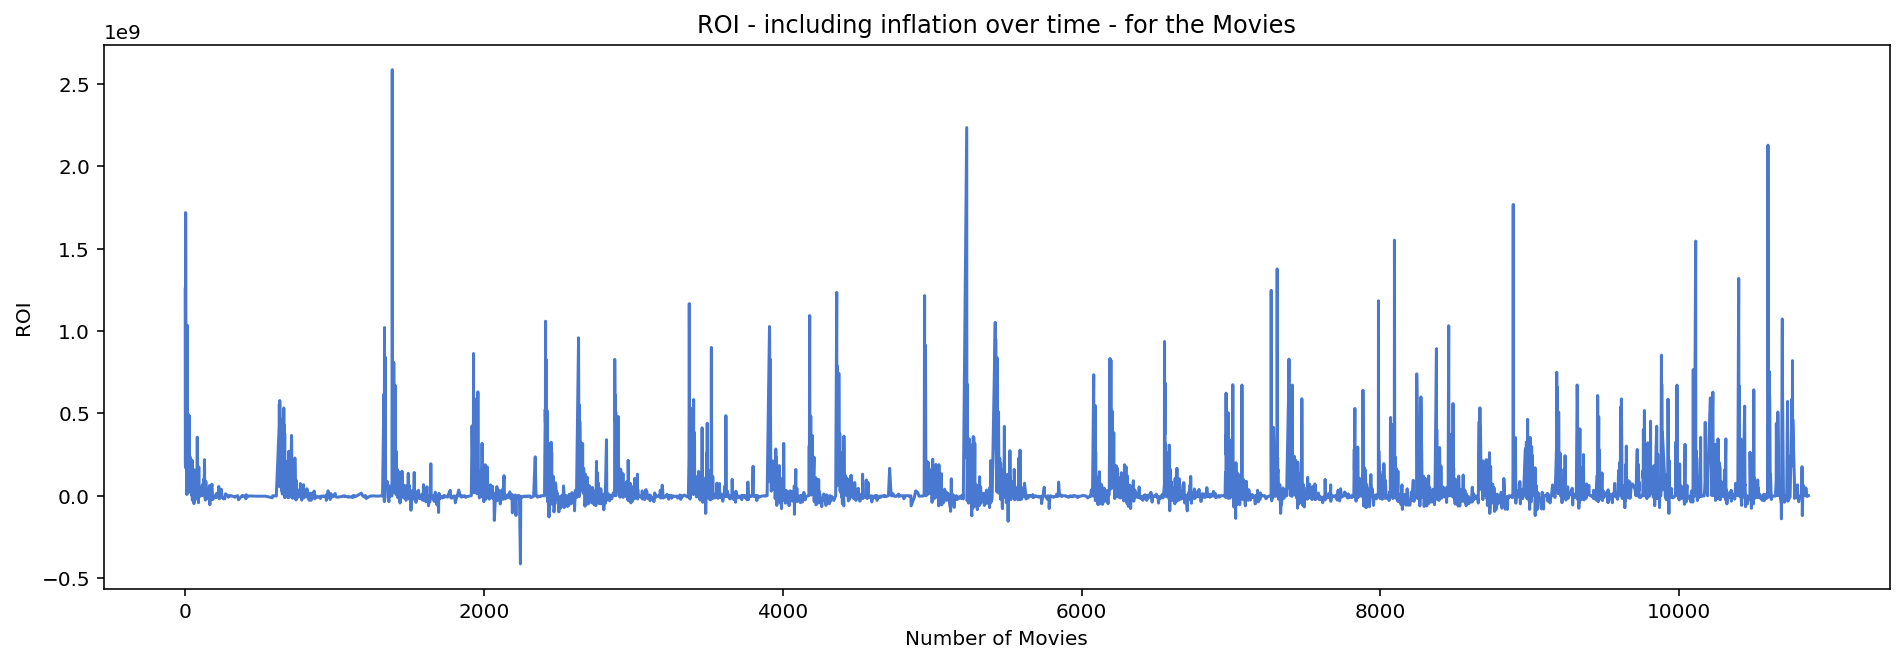

In [89]:
df_genre = train_df_genre[train_df_genre['budget_adj']!=0]
df_genre['roi'] = df_genre['revenue_adj'] - df_genre['budget_adj']

# plot the revenues for all movies in the dataset
plt.subplots(figsize=(16, 5))
plt.plot(df_genre['roi'])
plt.title('ROI - including inflation over time - for the Movies')
plt.xlabel('Number of Movies')
plt.ylabel('ROI');

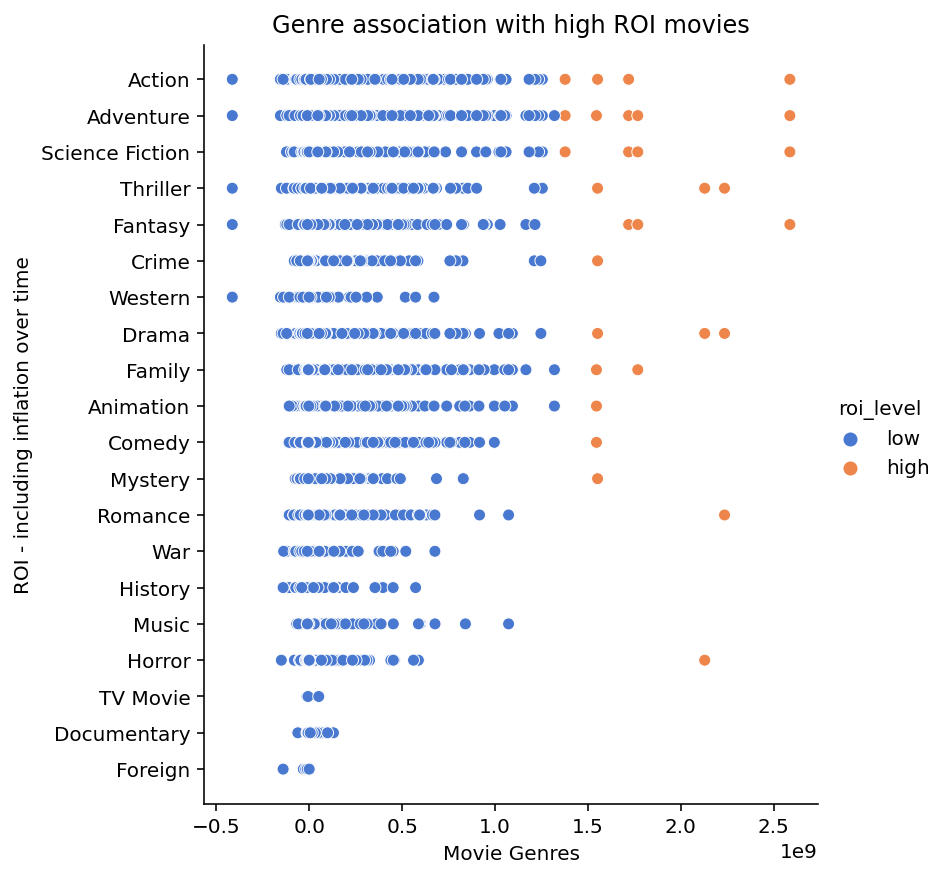

In [90]:
# select high revenues
high_ROI = df_genre['roi'].nlargest(30)

# Get an entire dataframe for movies with high revenues
df_high_roi = df_genre.query('roi in @high_ROI')

# Add a new column "revenue_level" with "low" as default value
df_roi = df_genre.assign(roi_level='low')

# set "high" where for the movies with high revenues
for roi in high_ROI:
    df_roi.loc[df_roi['roi'] == roi, 'roi_level'] = 'high'

# plot of budget association with revenue
budgetplot = sns.relplot(x="roi", y="genre", hue="roi_level", data=df_roi, height=6)
budgetplot.set(title='Genre association with high ROI movies', 
               xlabel='Movie Genres', 
               ylabel='ROI - including inflation over time');

#Text Cleaning

In [35]:
import re

def clean_text(doc):
    # lower case and remove special characters\whitespaces
    if(type(doc) == str):
      doc = re.sub(r'[^a-zA-Z0-9\s]', '', doc, re.I)
      doc = doc.lower()
      doc = doc.strip()
    else:
      doc = ""

    return doc

In [36]:
for i, row in train_df.iterrows():
  train_df.at[i, 'overview_clean'] = clean_text(row.overview)

# part-of-speech (POS) tagging

In [37]:
import locale
locale.setlocale(locale.LC_ALL, 'en_US.utf8')
locale.getpreferredencoding = lambda: "UTF-8"

In [38]:
!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 KB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 KB 14.4 MB/s eta 0:00:00


In [39]:
import spacy
nlp = spacy.load('en_core_web_sm')
import contractions
import unicodedata

In [40]:
for i, row in train_df.iterrows():
    if i % 1000 == 0:
        print(i)
#     if(row["overview"] and len(str(row["overview"])) < 1000000):
    if row["overview_clean"]:
        # Remove special characters using regular expression
        clean_text = re.sub(r'[^\w\s]', '', str(row["overview_clean"]))
        # Remove accent characters using the unicodedata module
        no_accent_text = ''.join(char for char in unicodedata.normalize('NFD', clean_text) if unicodedata.category(char) != 'Mn')
        # Expand contractions using contractions library
        expanded_text = contractions.fix(no_accent_text)
        doc = nlp(expanded_text)
        # Tokenization
        tokens = [token.text for token in doc]
#         print('tokens', tokens)
        # Stopword removal
        filtered_tokens = [token for token in doc if not token.is_stop]
#         print('filtered_tokens', filtered_tokens)
        # Lemmatization
        lemmas = [token.lemma_ for token in filtered_tokens if not token.is_stop]
#         print('lemmas', lemmas)
        adjectives = []
        nouns = []
        verbs = []
        # Add part-of-speech (POS) tagging
        for token in filtered_tokens:
            if token.pos_ == "ADJ":
                adjectives.append(token.lemma_)
            if token.pos_ == "NOUN" or token.pos_ == "PROPN":
                nouns.append(token.lemma_)
            if token.pos_ == "VERB":
                verbs.append(token.lemma_)
        train_df.at[i, "overview_lemma"] = " ".join(lemmas)
        train_df.at[i, "overview_nouns"] = " ".join(nouns)
        train_df.at[i, "overview_adjectives"] = " ".join(adjectives)
        train_df.at[i, "overview_verbs"] = " ".join(verbs)
        train_df.at[i, "overview_nav"] = " ".join(nouns+adjectives+verbs)
        train_df.at[i, "no_tokens"] = len(lemmas)
        person = []
        org = []
        gpe = [] # geopolitical entity
        date = []
        time = []
        money = []
        for ent in doc.ents:
#             print(ent.text, ent.label_)
            if ent.label_ == "PERSON":
                person.append(ent.text)
            if ent.label_ == "ORG":
                org.append(ent.text)
            if ent.label_ == "DATE":
                date.append(ent.text)
            if ent.label_ == "TIME":
                time.append(ent.text)
            if ent.label_ == "MONEY":
                money.append(ent.text)
            if ent.label_ == "GPE":
                gpe.append(ent.text)
        train_df.at[i, "overview_person"] = "|".join(person)
        train_df.at[i, "overview_org"] = "|".join(org)
        train_df.at[i, "overview_date"] = "|".join(date)
        train_df.at[i, "overview_time"] = "|".join(time)
        train_df.at[i, "overview_money"] = "|".join(money)
        train_df.at[i, "overview_gpe"] = "|".join(gpe)

9000
7000
1000
10000
4000
0
6000
8000
3000


In [41]:
train_df.head(10)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview_adjectives,overview_verbs,overview_nav,no_tokens,overview_person,overview_org,overview_date,overview_time,overview_money,overview_gpe
3420,71676,tt1071875,1.481016,57000000,149217355,Ghost Rider: Spirit of Vengeance,Nicolas Cage|CiarÃ¡n Hinds|Violante Placido|Fe...,http://www.thespiritofvengeance.com/,Mark Neveldine|Brian Taylor,He Rides Again.,...,devil human supernatural unsavory,come transform flamespewe rescue,resurface aim world form johnny blaze hiding h...,23.0,,,,,,
1672,41360,tt1270291,0.356006,425000,0,Hunter Prey,Isaac C. Singleton Jr.|Clark Bartram|Damion Po...,http://www.hunterpreythemovie.com/,Sandy Collora,One man. One alien. One choice.,...,critical unknown alien alive dangerous escaped...,drop catch survive pursue,prometheus orbit communication life support sy...,33.0,,,,,,
293,277713,tt2262161,0.421790,0,0,Sunset Song,Peter Mullan|Agyness Deyn|Kevin Guthrie|Hugh R...,NaN,Terence Davies,NaN,...,scottish early,come,daughter farmer age scottish early come,7.0,,,the early 1900s,,,
8306,11066,tt0103859,0.410039,40000000,70100000,Boomerang,Eddie Murphy|Robin Givens|Halle Berry|David Al...,NaN,Reginald Hudlin,A Player Who's About to be Played.,...,successful new,woo bed find ravish treat traumatise go,marcus advertising executive woman company mer...,23.0,,,,,,
1748,2325,tt0432314,0.258982,0,0,Leningrad,Gabriel Byrne|Mira Sorvino|Armin Mueller-Stahl...,http://www.leningradfilm.com/,Aleksandr Buravsky,Some fight. Others fall. All are heroes.,...,foreign kate dead young idealist,invade besiege evacuate presume miss help figh...,nazi germany soviet union troop leningrad jour...,36.0,,nazi germany|nina tsvetnova,1941,,,the soviet union
3198,14248,tt0465502,0.259988,25000000,30000000,Igor,John Cusack|Myleene Klass|Robin Walsh|Matt McK...,NaN,Anthony Leondis,All men aren't created Evil.,...,evil evil,animate hunchbacke aspire,fable clich scientist assistant scientist disp...,14.0,,,,,,
5327,17100,tt0120380,0.459782,0,0,Trucks,Timothy Busfield|Brenda Bakke|Aidan Devine|Rom...,NaN,Chris Thomson,NaN,...,short,base tell come attack,story stephen king tale truck life owner short...,13.0,stephen king,,,,,
5080,1807,tt0363589,0.426977,3000000,10012022,Elephant,Alex Frost|Eric Deulen|John Robinson|Elias McC...,NaN,Gus Van Sant,An ordinary high school day. Except that it's ...,...,ordinary high daily malevolent,prepare chronicle surround,school student routine film event school shoot...,14.0,,,daily,,,
2859,21997,tt0263467,0.115051,0,0,In the Time of the Butterflies,Salma Hayek|Edward James Olmos|MÃ­a Maestro|De...,NaN,Mariano Barroso,Women had their place. Hers was in the revolut...,...,true mirabal underground,inspire murder overthrow,time butterfly story sister plot government tr...,13.0,,,1960,,,
2851,27834,tt0254199,0.133455,0,0,CQ,Jeremy Davies|Angela Lindvall|Ã‰lodie Bouchez|...,NaN,Roman Coppola,Every picture tells a story.,...,young personal newfound,direct direct cope crumble,filmmaker 1960 paris juggle cheesy scifi debac...,22.0,,,1960s,,,paris


# Creating a List of Tokens from a List of Documents

In [44]:
def my_tokenizer(text):
    return text.split() if (text != None and isinstance(text, str)) else []

In [45]:
# transform list of documents into a single list of tokens
filtered_tokens = train_df.overview_lemma.map(my_tokenizer).sum()

In [46]:
print(filtered_tokens[:200])

['devil', 'resurface', 'aim', 'world', 'human', 'form', 'johnny', 'blaze', 'reluctantly', 'come', 'hiding', 'transform', 'flamespewe', 'supernatural', 'hero', 'ghost', 'rider', 'rescue', '10yearold', 'boy', 'unsavory', 'end', 'prometheus', 'drop', 'orbit', 'communication', 'life', 'support', 'system', 'situation', 'critical', 'status', 'crew', 'prisoner', 'unknown', 'order', 'catch', 'alien', 'prisoner', 'alive', 'survive', 'crew', 'spaceship', 'prometheus', 'pursue', 'dangerous', 'game', 'catandmouse', 'escaped', 'prisoner', 'deserted', 'barren', 'planet', 'hunter', 'prey', 'daughter', 'scottish', 'farmer', 'come', 'age', 'early', '1900s', 'marcus', 'successful', 'advertising', 'executive', 'woo', 'bed', 'woman', 'company', 'merger', 'find', 'new', 'boss', 'ravish', 'jacqueline', 'treat', 'exactly', 'way', 'completely', 'traumatise', 'work', 'go', 'badly', 'downhill', '1941', 'nazi', 'germany', 'invade', 'soviet', 'union', 'troop', 'quickly', 'besiege', 'leningrad', 'foreign', 'journa

In [47]:
counter = Counter(filtered_tokens)
counter.most_common(20)

[('life', 1657),
 ('find', 1592),
 ('new', 1261),
 ('man', 1200),
 ('young', 1198),
 ('world', 1025),
 ('friend', 1022),
 ('family', 953),
 ('story', 891),
 ('film', 875),
 ('love', 856),
 ('year', 854),
 ('woman', 737),
 ('take', 736),
 ('time', 696),
 ('live', 641),
 ('try', 627),
 ('come', 608),
 ('father', 597),
 ('way', 593)]

# Using Word Clouds

In [48]:
from wordcloud import WordCloud

def wordcloud(counter):
    """A small wordloud wrapper"""
    wc = WordCloud(width=1200, height=800, 
                   background_color="white", 
                   max_words=200) 
    wc.generate_from_frequencies(counter)

    # Plot
    fig=plt.figure(figsize=(6, 4))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

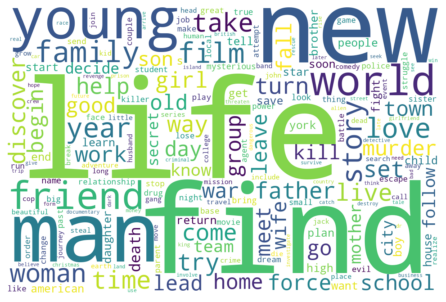

In [49]:
# create wordcloud
wordcloud(counter)

# Word frequency by genre

In [60]:
train_df['genres']

3420                    Action|Fantasy|Thriller
1672                   Science Fiction|Thriller
293                                       Drama
8306                       Drama|Comedy|Romance
1748                                  War|Drama
                         ...                   
9939             Horror|Action|Mystery|Thriller
562       Mystery|Drama|History|Family|Thriller
8890    Horror|Science Fiction|Mystery|Thriller
1496                             Comedy|Romance
1378                     Horror|Science Fiction
Name: genres, Length: 8693, dtype: object

In [51]:
# Remove the "|" and split each cell content accordingly, in colums
train_df_genre = train_df.join(train_df.genres.str.strip('|').str.split('|', expand=True).stack().reset_index(level=1, drop=True).rename('genre'))

# Check visually the content of the new "genre" column
train_df_genre.genre.tail(4)

10862      Drama
10863    Mystery
10863     Comedy
10865     Horror
Name: genre, dtype: object

In [63]:
genre_count = train_df_genre.groupby('genre').count()

genre_count = genre_count.reset_index()
genre_count

,genre,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,...,overview_adjectives,overview_verbs,overview_nav,no_tokens,overview_person,overview_org,overview_date,overview_time,overview_money,overview_gpe
0,Action,1910,1906,1910,1910,1910,1910,1909,515,1905,...,1910,1910,1910,1910,1910,1910,1910,1910,1910,1910
1,Adventure,1158,1157,1158,1158,1158,1158,1157,352,1155,...,1158,1158,1158,1158,1158,1158,1158,1158,1158,1158
2,Animation,569,567,569,569,569,569,549,209,564,...,569,569,569,569,569,569,569,569,569,569
3,Comedy,2990,2989,2990,2990,2990,2990,2983,741,2982,...,2989,2989,2989,2989,2989,2989,2989,2989,2989,2989
4,Crime,1095,1095,1095,1095,1095,1095,1095,260,1094,...,1095,1095,1095,1095,1095,1095,1095,1095,1095,1095
5,Documentary,412,411,412,412,412,412,385,213,403,...,411,411,411,411,411,411,411,411,411,411
6,Drama,3798,3797,3798,3798,3798,3798,3791,970,3794,...,3798,3798,3798,3798,3798,3798,3798,3798,3798,3798
7,Family,966,966,966,966,966,966,957,258,959,...,966,966,966,966,966,966,966,966,966,966
8,Fantasy,729,727,729,729,729,729,726,215,726,...,729,729,729,729,729,729,729,729,729,729
9,Foreign,142,142,142,142,142,142,141,33,140,...,142,142,142,142,142,142,142,142,142,142


In [64]:
top_10_genre = genre_count.nlargest(10, 'id')['genre']
# get top_10_lemma

def my_tokenizer(text):
    return text.split() if(text != None and isinstance(text, str)) else []

# transform list of documents into a single list of tokens
tokens = train_df_genre.overview_lemma.map(my_tokenizer).sum()

counter = Counter(tokens)
top_20_word = counter.most_common(20)

print([t[0] for t in top_20_word]) 

['find', 'life', 'new', 'man', 'young', 'world', 'friend', 'family', 'love', 'story', 'year', 'film', 'take', 'woman', 'time', 'help', 'try', 'set', 'come', 'discover']


In [65]:
def get_counter_by_genre(genre):
    print(genre)
    df_filtered = train_df_genre[train_df_genre['genre'] == genre]
    tokens = df_filtered.overview_lemma.map(my_tokenizer).sum()
    return Counter(tokens)

counter_list = {}
for i in top_10_genre:
    counter_list[i] = get_counter_by_genre(i)

data = {'Genre': [genre for genre in top_10_genre]}

for word_info in top_20_word:
    word = word_info[0]
    word_count = []
    for genre in top_10_genre:
        word_count.append(counter_list[genre][word])
    data[word] = word_count

Drama
Comedy
Thriller
Action
Romance
Horror
Adventure
Crime
Science Fiction
Family


In [66]:
top_10_genre

6               Drama
3              Comedy
17           Thriller
0              Action
14            Romance
11             Horror
1           Adventure
4               Crime
15    Science Fiction
7              Family
Name: genre, dtype: object

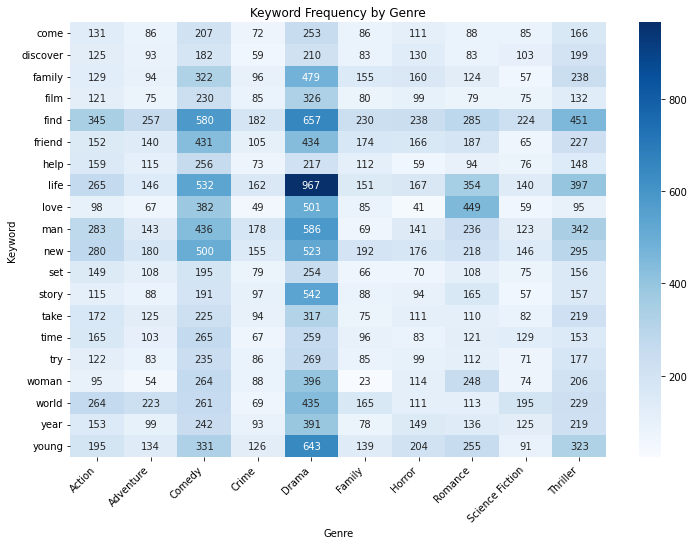

In [67]:
# Create a sample dataframe
df = pd.DataFrame(data)

# Convert dataframe to long format
df_long = pd.melt(df, id_vars=['Genre'], var_name='Keyword', value_name='Frequency')


# Set the figure size
plt.figure(figsize=(12, 8))

# Create a heatmap
ax = sns.heatmap(df_long.pivot('Keyword', 'Genre', 'Frequency'), cmap='Blues', annot=True, fmt='g')

# Set plot title and axis labels
plt.title('Keyword Frequency by Genre')
plt.xlabel('Genre')
plt.ylabel('Keyword')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Display the plot
plt.show()


# Genre Breakdown of Named Entity Counts

In [86]:
# get top_entities

def my_tokenizer(text):
    return text.split('|') if(text != None and isinstance(text, str)) else []

# transform list of documents into a single list of tokens
names = train_df.overview_person.map(my_tokenizer).sum()
org = train_df.overview_org.map(my_tokenizer).sum()
date = train_df.overview_date.map(my_tokenizer).sum()
time = train_df.overview_time.map(my_tokenizer).sum()
money = train_df.overview_money.map(my_tokenizer).sum()
gpe = train_df.overview_gpe.map(my_tokenizer).sum()

In [87]:
named_entities = names + org + date + time + money + gpe
named_entities = [x for x in named_entities if x != '']
named_entitiy_counter = Counter(named_entities)
top_20_entities = named_entitiy_counter.most_common(20)

print([t[0] for t in top_20_entities]) 

['new york', 'los angeles', 'london', 'us', 'new york city', 'fbi', 'years', 'america', 'christmas', 'paris', 'mike', 'jack', 'california', 'summer', 'france', 'texas', 'chicago', 'one day', 'the united states', 'john']


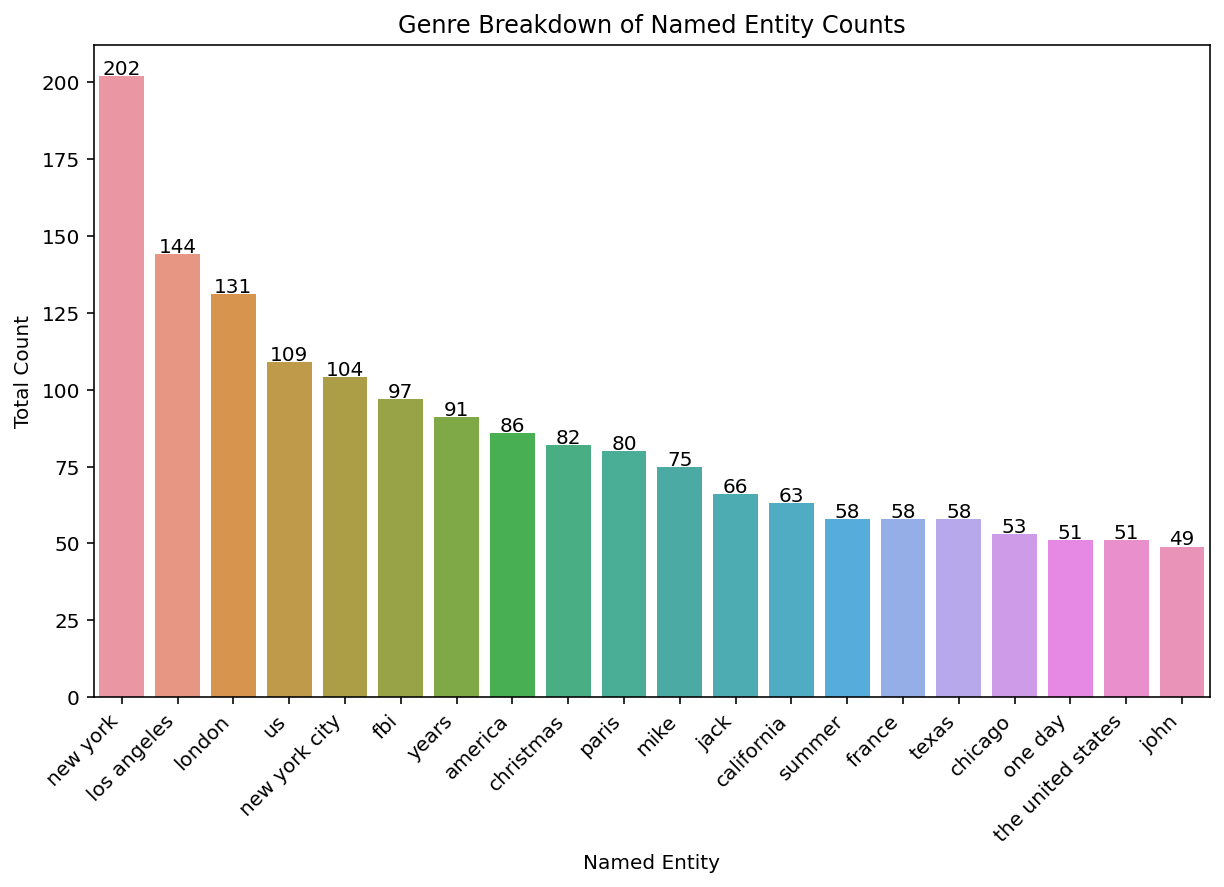

In [88]:
names = [t[0] for t in top_20_entities]
count = [t[1] for t in top_20_entities]

fig = plt.figure(figsize=(10,6))
sns.set_palette("muted")

named_entity_counts = pd.DataFrame({'names': names, 'count': count})
ax = sns.barplot(data=named_entity_counts, x='names', y='count', 
                 order=named_entity_counts.sort_values('count', ascending=False)['names'])

# Add numerical values to the bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height()+0.5, int(p.get_height()), 
            ha='center', fontsize=10)

ax.set(title='Genre Breakdown of Named Entity Counts', xlabel='Named Entity', ylabel='Total Count')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    
plt.show()

# Exploring Text Complexity

In [70]:
train_df['no_tokens'] = train_df.overview_lemma\
  .map(lambda l: 0 if (l==None or not isinstance(l, str)) else len(l.split()))

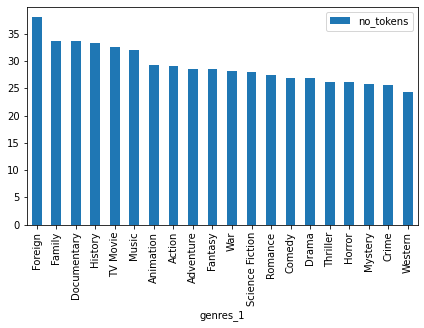

In [71]:
# mean number of tokens by category
train_df.groupby(['genres_1']) \
  .agg({'no_tokens':'mean'}) \
  .sort_values(by='no_tokens', ascending=False) \
  .plot(kind='bar', figsize=(7,4));

In [72]:
# render plots as retina or png, because svg is very slow
%config InlineBackend.figure_format = 'retina'

import seaborn as sns

def multi_boxplot(data, x, y, ylim = None):
    '''Wrapper for sns boxplot with cut-off functionality'''
    # plt.figure(figsize=(30, 5))
    fig, ax = plt.subplots()
    plt.xticks(rotation=90) 

    # order boxplots by median
    ordered_values = data.groupby(x)[[y]] \
                         .median() \
                         .sort_values(y, ascending=False) \
                         .index
        
    sns.boxplot(x=x, y=y, data=data, palette='Set2', 
                order=ordered_values)

    fig.set_size_inches(11, 6)
    
    # cut-off y-axis at value ylim
    ax.set_ylim(0, ylim)

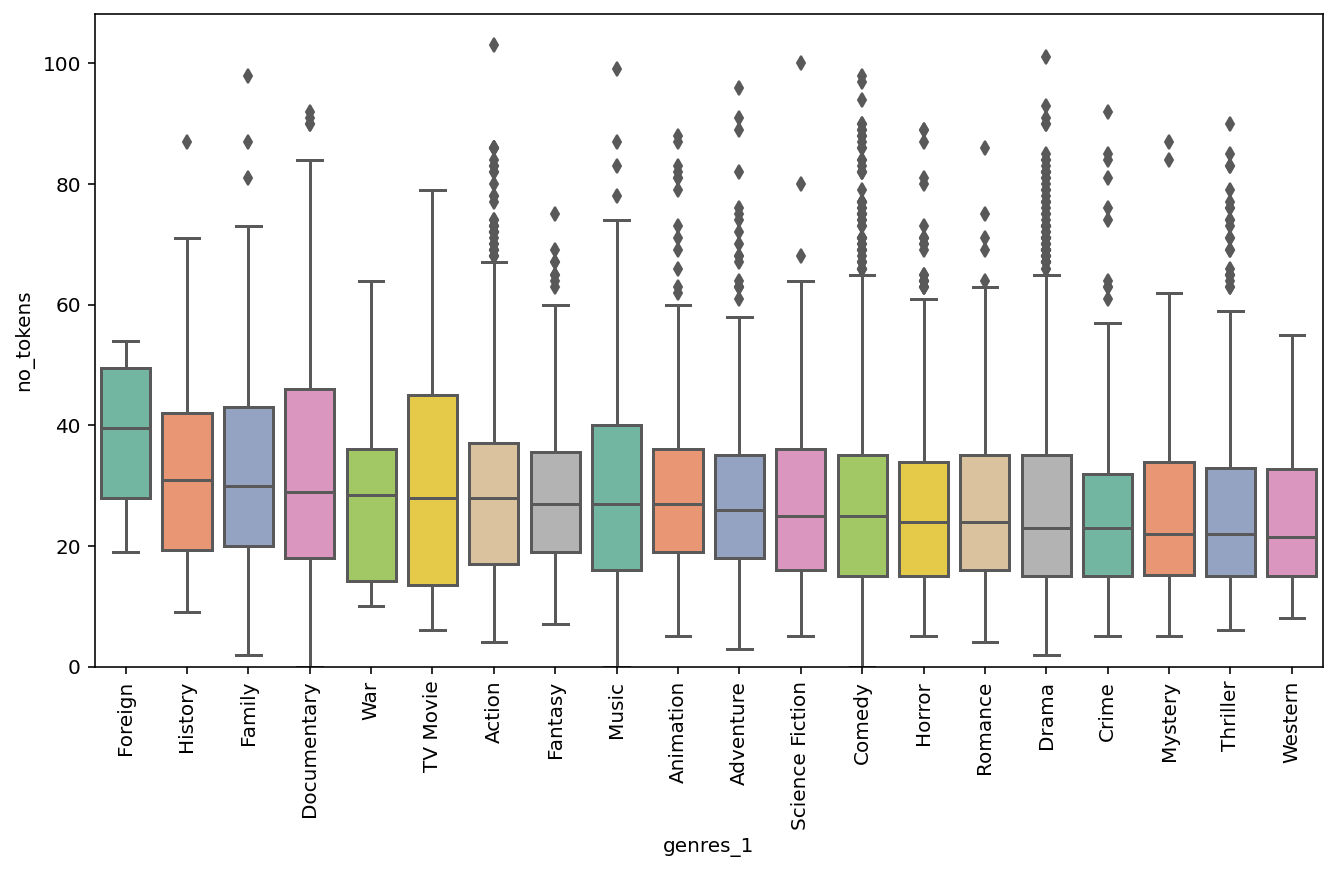

In [73]:
multi_boxplot(train_df, 'genres_1', 'no_tokens');

In [78]:
# print text of outliers
train_df['overview_lemma'][train_df.no_tokens > 90]

2401    ongoing celebration 20th anniversary sweden op...
1317    hear insane rumour scandal attach illfate 1996...
3817    la vida ha llevado julin parez por caminos equ...
5691    wealthy american housewife mary morgan take bu...
5647    puppy stumble power ring inspiron alien artifa...
3192    gianni 50 ans et des poussire vit avec sa mama...
3763    year 2125 alec mason lead martian colony freed...
7756    la antena english aerial 2007 argentine drama ...
3867    la vie nest pas rise tous les jours pour solwe...
3590    raise street turnofthe century london orphan p...
3551    dylan schoenfield pink princess upscale los an...
3894    story film odyssey write direct awardwinne fil...
3598    arabian peninsula 1930 war leader come face fa...
9899    kelly prostitute want transform life beat pimp...
435     christmas day away paige summerland los angele...
Name: overview_lemma, dtype: object

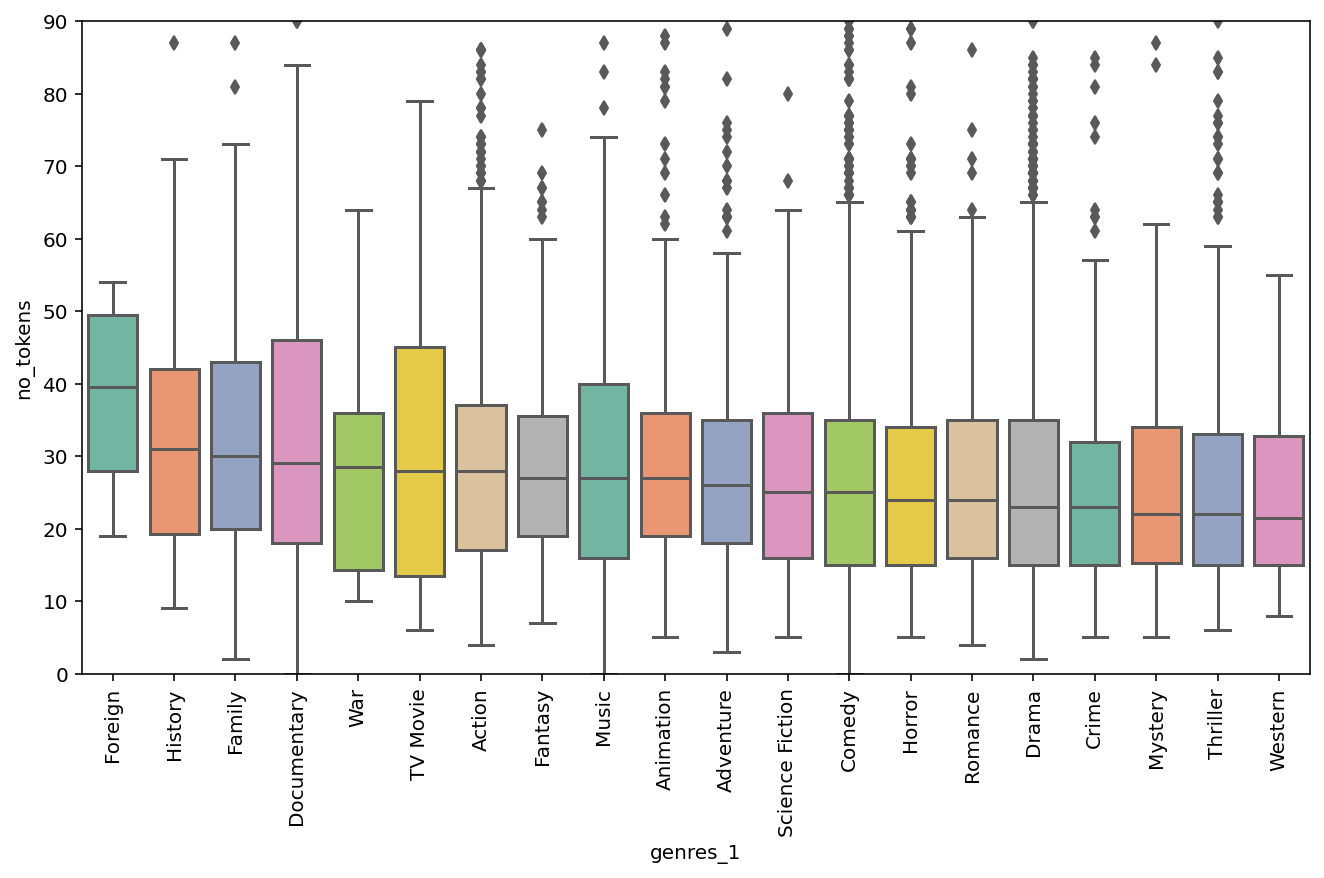

In [79]:
# cut-off diagram at y=175
multi_boxplot(train_df, 'genres_1', 'no_tokens', ylim=90)

# Finding Prominent Genres

In [76]:
genre_counter = Counter(train_df.genres_1)
genre_counter.most_common(15)

[('Drama', 1970),
 ('Comedy', 1826),
 ('Action', 1291),
 ('Horror', 723),
 ('Adventure', 452),
 ('Thriller', 406),
 ('Documentary', 343),
 ('Animation', 334),
 ('Crime', 311),
 ('Fantasy', 219),
 ('Science Fiction', 163),
 ('Romance', 149),
 ('Family', 114),
 ('Mystery', 106),
 ('Music', 83)]

In [83]:
genres = [t[0] for t in genre_counter.most_common(15)]
count = [t[1] for t in genre_counter.most_common(15)]

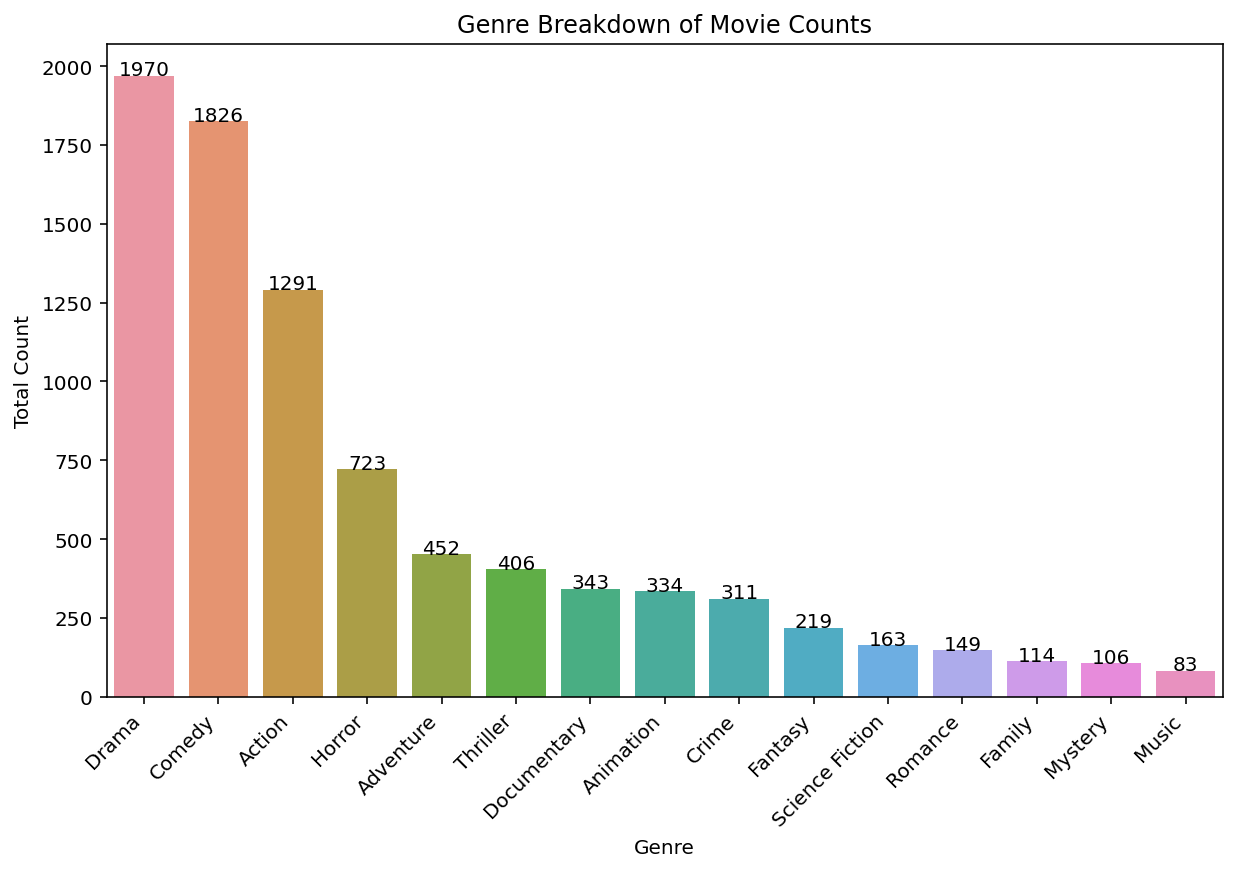

In [85]:
fig = plt.figure(figsize=(10,6))
sns.set_palette("muted")

df = pd.DataFrame({'genres': genres, 'count': count})
ax = sns.barplot(data=df, x='genres', y='count', 
                 order=df.sort_values('count', ascending=False)['genres'])

# Add numerical values to the bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height()+0.5, int(p.get_height()), 
            ha='center', fontsize=10)

ax.set(title='Genre Breakdown of Movie Counts', xlabel='Genre', ylabel='Total Count')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    
plt.show()